# Importing Packages 

In [1]:
#####
# Importing necessary packages 
#####
import pandas as pd
import numpy as np 
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import Dense,Dropout,Conv1D,MaxPooling1D,Flatten
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier






## Reading Dataset 

In [2]:
####
# Reading the dataset 
####
cancer_df = pd.read_csv("/content/risk_factors_cervical_cancer.csv")

In [3]:
####
# Viewing  the dataset 
####
cancer_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


# Dataset Analysis and Prepartion 

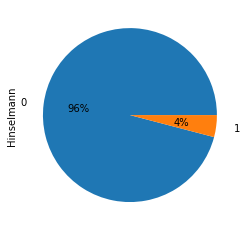

In [4]:
####
# Plotting Hinselmann column
####
cancer_df['Hinselmann'].value_counts().plot(kind = 'pie',autopct='%1.0f%%', labeldistance=1.2)

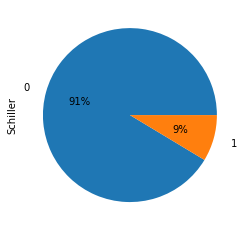

In [5]:
####
# Plotting Schiller column
####
cancer_df['Schiller'].value_counts().plot(kind = 'pie',autopct='%1.0f%%', labeldistance=1.2)

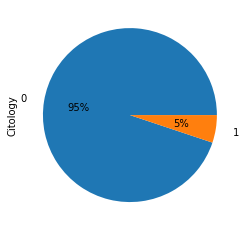

In [6]:
####
# Plotting Citology column
####
cancer_df['Citology'].value_counts().plot(kind = 'pie',autopct='%1.0f%%', labeldistance=1.2)

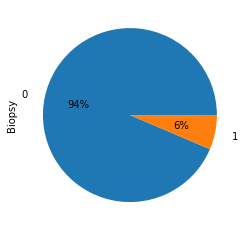

In [7]:
####
# Plotting Biopsy column
####
cancer_df['Biopsy'].value_counts().plot(kind = 'pie',autopct='%1.0f%%', labeldistance=1.2)

# Defining the binary classification column

In [8]:
####
# Creating new column equal to the summation of cancer columns
####
cancer_df["have_cancer"]= cancer_df['Hinselmann']+cancer_df['Schiller']+cancer_df['Citology']+cancer_df['Biopsy']

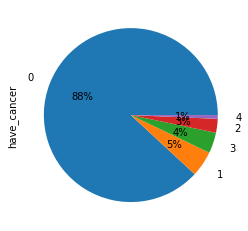

In [9]:
####
# Plotting have_cancer column
####
cancer_df["have_cancer"].value_counts().plot(kind = 'pie',autopct='%1.0f%%', labeldistance=1.2)

In [10]:
####
# Converting any entry to either 0 if have no cancer or 1 if have cancer 
####
for i , entry in enumerate(cancer_df["have_cancer"]) :
  if cancer_df["have_cancer"][i] in [1,2,3,4]:
    cancer_df.iloc[i,-1] = 1 
  else : 
    cancer_df.iloc[i,-1]  = 0 
  

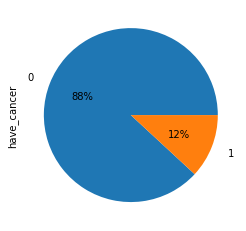

In [11]:
####
# Plotting have_cancer column after modififcations 
####
cancer_df["have_cancer"].value_counts().plot(kind = 'pie',autopct='%1.0f%%', labeldistance=1.2)


In [12]:
####
# Removing old columns 
####
cancer_df.drop([ 'Hinselmann',	'Schiller',	'Citology'	,'Biopsy' ] , axis =1 , inplace= True )

In [13]:
####
# Viewing the dataset after modifcations 
####
cancer_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,have_cancer
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,1
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0


# Identifying X and Y

In [14]:
X = cancer_df.iloc[:, :-1]

In [15]:
Y = cancer_df.iloc[:, -1]

# Sampling process 

In [16]:
! pip install imblearn

In [17]:
from imblearn.combine import SMOTEENN
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


### Since we cannot use '?' when sampling we will convert it temporary to -1  

In [18]:
####
# Replacing every '?' with -1
####
X.replace({'?': -1} , inplace=True)

# Doing Sampling Process 
## <font color = Orange >Using SMOTE EDITED NEAREST NEIGHBOUR TECHNIQUE (COMBINATION OF OVERSAMPLING AND UNDERSAMPLING)

In [19]:
###
# Defining the smote-enn and applying it 
###
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, Y)

In [20]:
###
# Creating Dataframe from sampled X
###
X_resampled_df = pd.DataFrame(X_resampled , columns= X.columns)

In [21]:
###
# Viewing the dataframe
####
X_resampled_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
0,15.000000,1.000000,14.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-1.000000,-1.000000,0.0,0.0,0.0,0.0
1,34.000000,1.000000,-1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-1.000000,-1.000000,0.0,0.0,0.0,0.0
2,52.000000,5.000000,16.000000,4.000000,1.0,37.000000,37.000000,1.000000,3.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-1.000000,-1.000000,1.0,0.0,1.0,0.0
3,42.000000,3.000000,23.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-1.000000,-1.000000,0.0,0.0,0.0,0.0
4,44.000000,3.000000,26.000000,4.000000,0.0,0.000000,0.000000,1.000000,2.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-1.000000,-1.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,32.471034,2.924433,16.075567,3.622167,1.0,13.622167,1.396222,1.000000,1.151133,0.0,0.0,1.0,1.075567,0.075567,0.0,0.0,0.075567,0.0,0.0,0.0,0.0,0.0,0.924433,0.0,0.0,1.0,15.319901,15.319901,0.0,0.0,0.0,0.0
1087,25.828841,2.342318,16.657682,-0.315364,1.0,8.657682,1.238747,0.828841,2.486523,0.0,0.0,1.0,2.000000,1.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,6.657682,6.657682,0.0,0.0,0.0,0.0
1088,31.371387,2.209538,17.000000,2.209538,1.0,9.209538,1.130491,1.000000,9.161849,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-1.000000,-1.000000,0.0,0.0,0.0,0.0
1089,29.951583,-0.951583,13.019367,3.000000,1.0,21.854750,3.274823,0.000000,0.000000,0.0,0.0,1.0,1.009683,0.009683,0.0,0.0,0.009683,0.0,0.0,0.0,0.0,0.0,0.990317,0.0,0.0,1.0,3.019367,3.019367,0.0,0.0,0.0,0.0


In [22]:
###
# Creating Dataframe from sampled y and viewing dataframe
###
Y_resampled_df = pd.DataFrame(y_resampled, columns= ['have_cancer'])
Y_resampled_df

,have_cancer
0,0
1,0
2,0
3,0
4,0
...,...
1086,1
1087,1
1088,1
1089,1


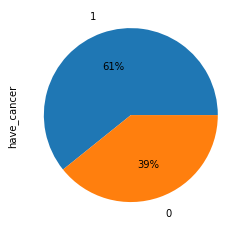

In [23]:
####
# Plotting have_cancer column after modifications 
####
Y_resampled_df['have_cancer'].value_counts().plot(kind='pie',autopct='%1.0f%%', labeldistance=1.2)

In [24]:
####
# Getting shape of dataframe 
####
X_resampled_df.shape

(1091, 32)

# Defining Network and helper function 

## Defining Neural Network 

In [25]:
nn_model = Sequential()
nn_model.add(Dense(60, input_dim=32, activation='relu'))
nn_model.add(Dense(20, activation='relu'))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(1, activation='sigmoid'))
# Compile model
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                1980      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1220      
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 3,221
Trainable params: 3,221
Non-trainable params: 0
_________________________________________________________________


## Defining Convilutional Neural Network

In [26]:
model = Sequential([
  Conv1D(8, 3, input_shape=(32,1,), padding='same'),
  MaxPooling1D(pool_size=2,padding='same'),
  Flatten(),
  Dense(1, activation='sigmoid')
])


In [27]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 32, 8)             32        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 16, 8)             0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [28]:
X = X_resampled_df.iloc[:,:]
Y = Y_resampled_df.iloc[:,:]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
nn_model.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss, test_acc = nn_model.evaluate(X_test, Y_test) 
y_pred1 = nn_model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

Epoch 1/50
763/763 [==============================] - 2s 1ms/step - loss: 1.3794 - accuracy: 0.5776
Epoch 2/50
763/763 [==============================] - 1s 2ms/step - loss: 0.6184 - accuracy: 0.5963
Epoch 3/50
763/763 [==============================] - 1s 2ms/step - loss: 0.5936 - accuracy: 0.6302
Epoch 4/50
763/763 [==============================] - 1s 2ms/step - loss: 0.5587 - accuracy: 0.6794
Epoch 5/50
763/763 [==============================] - 1s 2ms/step - loss: 0.5699 - accuracy: 0.6583
Epoch 6/50
763/763 [==============================] - 1s 2ms/step - loss: 0.5583 - accuracy: 0.6528
Epoch 7/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5730 - accuracy: 0.6261
Epoch 8/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5402 - accuracy: 0.6711
Epoch 9/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5141 - accuracy: 0.6977
Epoch 10/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4923 - accuracy: 0.7019

In [29]:
y_pred = np.round(y_pred1)
precision= precision_score(Y_test, y_pred , average="macro")
recall = recall_score(Y_test, y_pred , average="macro")
F1_score = f1_score(Y_test, y_pred , average="macro")
cm = confusion_matrix(Y_test, y_pred)

## Defining Helper Function

In [30]:

def get_part_of_data(limit = 100 , model_mode = 0  ):
  '''
  This Function takes part of dataset feed it to the Neural network choosen then 
  Evalute results 
  Parameters : 
  limit(int) : The number of rows to fetch from dataset
  model_mode (int) : Use Neural network if 0 
                      Use CNN if 1 
  return :
  accuracy (float): Accuracy of the model 
  loss (float): loss of the model 
  -1 : if model_mode is not valid
  '''
  X = X_resampled_df.iloc[:limit,:]
  Y = Y_resampled_df.iloc[:limit,:]
  if model_mode == 0 :
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
    nn_model.fit(X_train, Y_train, epochs=50, batch_size=1)
    test_loss, test_acc = nn_model.evaluate(X_test, Y_test) 
    y_pred1 = nn_model.predict(X_test)
    y_pred = np.round(y_pred1)
    # Print f1, precision, and recall scores
    precision= precision_score(Y_test, y_pred , average="macro")
    recall = recall_score(Y_test, y_pred , average="macro")
    F1_score = f1_score(Y_test, y_pred , average="macro")
    cm = confusion_matrix(Y_test, y_pred)
  elif model_mode == 1 : 
    x_train_list = []
    for index , item in X.iterrows() : 
      item = np.expand_dims(item , axis =1)
      x_train_list.append(item)
    X_numpy= np.array(x_train_list)
    X_train, X_test, Y_train, Y_test = train_test_split(X_numpy, Y, test_size=0.3, random_state=0)
    model.fit(X_train, Y_train, epochs=50, batch_size=1)
    test_loss, test_acc = model.evaluate(X_test, Y_test) 
    y_pred1 = model.predict(X_test)
    y_pred = np.round(y_pred1)

    # Print f1, precision, and recall scores
    precision= precision_score(Y_test, y_pred , average="macro")
    recall = recall_score(Y_test, y_pred , average="macro")
    F1_score = f1_score(Y_test, y_pred , average="macro")
    cm = confusion_matrix(Y_test, y_pred)
  else :
    return -1 
  return test_loss, test_acc, precision,recall,F1_score,cm

# Using Neural Network 

In [31]:
####
# Creating a list to gather in it different losses and accuracies using different sizes of dataset 
####
accuracy_list = [] 
sizes = [500,600,700,800,900,1000,1091]
for size in sizes :
  test_loss, test_acc, precision,recall,F1_score,cm  = get_part_of_data(limit = size , model_mode = 0 )
  accuracy_list.append({'Accuracy' : test_acc , 
                        'Loss':test_loss , 
                        'Precision':precision , 
                        'Recall':recall , 
                        'F1_score':F1_score , 
                        'cm':cm , 
                        "Size":size })


Epoch 1/50
350/350 [==============================] - 1s 2ms/step - loss: 0.3795 - accuracy: 0.9057
Epoch 2/50
350/350 [==============================] - 1s 2ms/step - loss: 0.3745 - accuracy: 0.8886
Epoch 3/50
350/350 [==============================] - 1s 1ms/step - loss: 0.2899 - accuracy: 0.9171
Epoch 4/50
350/350 [==============================] - 1s 1ms/step - loss: 0.2807 - accuracy: 0.9200
Epoch 5/50
350/350 [==============================] - 0s 1ms/step - loss: 0.2282 - accuracy: 0.9257
Epoch 6/50
350/350 [==============================] - 0s 1ms/step - loss: 0.2503 - accuracy: 0.9200
Epoch 7/50
350/350 [==============================] - 1s 2ms/step - loss: 0.2476 - accuracy: 0.9257
Epoch 8/50
350/350 [==============================] - 1s 1ms/step - loss: 0.2533 - accuracy: 0.9286
Epoch 9/50
350/350 [==============================] - 1s 1ms/step - loss: 0.2286 - accuracy: 0.9200
Epoch 10/50
350/350 [==============================] - 1s 2ms/step - loss: 0.2419 - accuracy: 0.9286

In [32]:
####
# Getting accuracy as y-axis 
# Getting Sizes as x-axis 
####

xAxis = []
yAxis_precesion = []
yAxis_recall = []
yAxis_f1_score = []
yAxis_acc = []
confusion_matrix_nn=[]
for dicT in accuracy_list : 
  yAxis_acc.append(dicT['Accuracy'])
  yAxis_f1_score.append(dicT['F1_score'])
  yAxis_recall.append(dicT['Recall'])
  yAxis_precesion.append(dicT['Precision'])
  xAxis.append(dicT['Size'])
  confusion_matrix_nn.append(dicT['cm'])

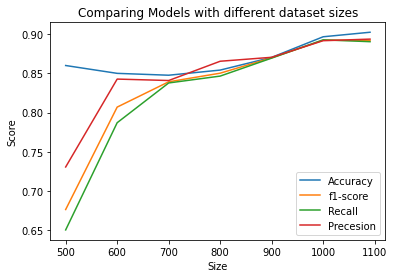

In [33]:
###
#Plotting accuracy of model using different sizes 
###
plt.plot(xAxis,yAxis_acc, label = "Accuracy")
plt.plot(xAxis,yAxis_f1_score, label = "f1-score")
plt.plot(xAxis,yAxis_recall, label = "Recall")
plt.plot(xAxis,yAxis_precesion, label = "Precesion")

plt.title('Comparing Models with different dataset sizes')
plt.xlabel('Size')
plt.ylabel('Score')
plt.legend()
plt.show()

## Confusion Matrix

In [34]:
sizes = [500,600,700,800,900,1000,1091]
for size , cm in zip (sizes, confusion_matrix_nn) : 
  print('size' , size)
  print('Confusion Matrix')
  print(cm)



size 500
Confusion Matrix
[[121   6]
 [ 15   8]]
size 600
Confusion Matrix
[[119   7]
 [ 20  34]]
size 700
Confusion Matrix
[[113  15]
 [ 17  65]]
size 800
Confusion Matrix
[[122   8]
 [ 27  83]]
size 900
Confusion Matrix
[[109  19]
 [ 16 126]]
size 1000
Confusion Matrix
[[104  15]
 [ 16 165]]
size 1091
Confusion Matrix
[[ 97  17]
 [ 15 199]]


# Using Convloution Nueral Network 

In [35]:
####
# Creating a list to gather in it different losses and accuracies using different sizes of dataset 
####
accuracy_list_cnn = [] 
sizes = [700,800,900,1000,1091]
for size in sizes :
  test_loss, test_acc, precision,recall,F1_score,cm  = get_part_of_data(limit = size ,model_mode = 1 )
  accuracy_list_cnn.append({'Accuracy' : test_acc , 
                        'Loss':test_loss , 
                        'Precision':precision , 
                        'Recall':recall , 
                        'F1_score':F1_score , 
                        'cm':cm , 
                        "Size":size })


Epoch 1/50
490/490 [==============================] - 1s 1ms/step - loss: 0.6426 - accuracy: 0.6399
Epoch 2/50
490/490 [==============================] - 1s 1ms/step - loss: 0.6355 - accuracy: 0.6524
Epoch 3/50
490/490 [==============================] - 1s 1ms/step - loss: 0.6056 - accuracy: 0.6759
Epoch 4/50
490/490 [==============================] - 1s 1ms/step - loss: 0.6071 - accuracy: 0.6838
Epoch 5/50
490/490 [==============================] - 1s 1ms/step - loss: 0.5467 - accuracy: 0.7215
Epoch 6/50
490/490 [==============================] - 1s 1ms/step - loss: 0.5470 - accuracy: 0.6992
Epoch 7/50
490/490 [==============================] - 1s 1ms/step - loss: 0.5714 - accuracy: 0.7195
Epoch 8/50
490/490 [==============================] - 1s 1ms/step - loss: 0.5511 - accuracy: 0.7161
Epoch 9/50
490/490 [==============================] - 1s 1ms/step - loss: 0.5240 - accuracy: 0.7693
Epoch 10/50
490/490 [==============================] - 1s 1ms/step - loss: 0.5647 - accuracy: 0.7276

In [36]:
####
# Getting accuracy as y-axis 
# Getting Sizes as x-axis 
####
xAxis_cnn = []
yAxis_precesion_cnn = []
yAxis_recall_cnn = []
yAxis_f1_score_cnn = []
yAxis_acc_cnn = []
confusion_matrix_cnn =[]
for dicT in accuracy_list_cnn : 
  yAxis_acc_cnn.append(dicT['Accuracy'])
  yAxis_f1_score_cnn.append(dicT['F1_score'])
  yAxis_recall_cnn.append(dicT['Recall'])
  yAxis_precesion_cnn.append(dicT['Precision'])
  xAxis_cnn.append(dicT['Size'])
  confusion_matrix_cnn.append(dicT['cm'])

In [37]:
xAxis

[500, 600, 700, 800, 900, 1000, 1091]

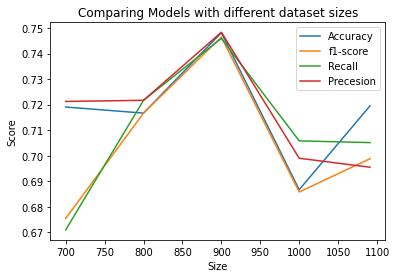

In [38]:
###
#Plotting accuracy of model using different sizes 
###
plt.plot(xAxis_cnn,yAxis_acc_cnn, label = "Accuracy")
plt.plot(xAxis_cnn,yAxis_f1_score_cnn, label = "f1-score")
plt.plot(xAxis_cnn,yAxis_recall_cnn, label = "Recall")
plt.plot(xAxis_cnn,yAxis_precesion_cnn, label = "Precesion")

plt.title('Comparing Models with different dataset sizes')
plt.xlabel('Size')
plt.ylabel('Score')
plt.legend()
plt.show()

## Confusion Matix

In [39]:
sizes = [700,800,900,1000,1091]
for size , cm in zip (sizes, confusion_matrix_cnn) : 
  print('size' , size)
  print('Confusion Matrix')
  print(cm)


size 700
Confusion Matrix
[[114  14]
 [ 45  37]]
size 800
Confusion Matrix
[[86 44]
 [24 86]]
size 900
Confusion Matrix
[[ 90  38]
 [ 30 112]]
size 1000
Confusion Matrix
[[ 95  24]
 [ 70 111]]
size 1091
Confusion Matrix
[[ 75  39]
 [ 53 161]]


# Comments 
<font color = 'orange'>

- Using Dataset sizes from 500 to 1091 in Neural Network because using smaller sizes will cause overfitting of model<br> 
-  Using Dataset sizes from 700 to 1091 in Convolutional Neural Network because using smaller sizes will cause overfitting of model 

# Feature Selection

## <font color = 'orange'>Feature Importance
- We can get the feature importance of each feature of our dataset by using the feature importance property of the model.<br>
- Feature importance gives us a score for each feature of our data, the higher the score more important or relevant is the feature towards our output variable.<br>
- Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.



In [46]:
accuracy_list=[]
precesion_list=[]
f1_score_list=[]
recall_list=[]
cm_list=[]


accuracy_list_cnn=[]
precesion_list_cnn=[]
f1_score_list_cnn=[]
recall_list_cnn=[]
cm_list_cnn=[]

## Using top 5 Features

[0.11838937 0.10257242 0.11561027 0.07842591 0.03138238 0.02863142
 0.02677897 0.08981556 0.0928267  0.03756531 0.02742868 0.01104565
 0.0095784  0.01633138 0.01385316 0.00814623 0.01405364 0.00865124
 0.01019435 0.00636945 0.0121328  0.0155724  0.01086419 0.00781196
 0.0097146  0.00842327 0.00849424 0.00879557 0.02316653 0.00666915
 0.02116935 0.01953547]


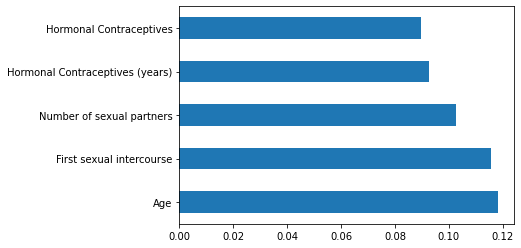

In [47]:

feature_nodel = ExtraTreesClassifier()
feature_nodel.fit(X_resampled_df,Y_resampled_df['have_cancer'])
print(feature_nodel.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(feature_nodel.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

## Build Neural Network 

In [48]:
nn_model_five_features = Sequential()
nn_model_five_features.add(Dense(60, input_dim=5, activation='relu'))
nn_model_five_features.add(Dense(20, activation='relu'))
nn_model_five_features.add(Dropout(0.5))
nn_model_five_features.add(Dense(1, activation='sigmoid'))
# Compile model
nn_model_five_features.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model_five_features.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 60)                360       
_________________________________________________________________
dense_8 (Dense)              (None, 20)                1220      
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 21        
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


In [49]:
###
#Create Dataframe of top five features
####
X_five_features=X_resampled_df[['Age' ,'Number of sexual partners','First sexual intercourse' , 'Hormonal Contraceptives' , 'Hormonal Contraceptives (years)' ]]

In [50]:
###
#View Dataframe of top five features
####
X_five_features

,Age,Number of sexual partners,First sexual intercourse,Hormonal Contraceptives,Hormonal Contraceptives (years)
0,15.000000,1.000000,14.000000,0.000000,0.000000
1,34.000000,1.000000,-1.000000,0.000000,0.000000
2,52.000000,5.000000,16.000000,1.000000,3.000000
3,42.000000,3.000000,23.000000,0.000000,0.000000
4,44.000000,3.000000,26.000000,1.000000,2.000000
...,...,...,...,...,...
1086,32.471034,2.924433,16.075567,1.000000,1.151133
1087,25.828841,2.342318,16.657682,0.828841,2.486523
1088,31.371387,2.209538,17.000000,1.000000,9.161849
1089,29.951583,-0.951583,13.019367,0.000000,0.000000


In [51]:

####
# Train and test NN model 
####

X_train, X_test, Y_train, Y_test = train_test_split(X_five_features, Y_resampled_df, test_size=0.3, random_state=0)
nn_model_five_features.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss, test_acc_five = nn_model_five_features.evaluate(X_test, Y_test) 
y_pred1 = nn_model_five_features.predict(X_test)
y_pred = np.round(y_pred1)

precision_five_features= precision_score(Y_test, y_pred , average="binary",labels=np.unique(y_pred))
recall_five_features = recall_score(Y_test, y_pred , average="binary")
F1_score_five_features = f1_score(Y_test, y_pred , average="binary")
cm_five_features = confusion_matrix(Y_test, y_pred)



accuracy_list.append(test_acc_five)
precesion_list.append(precision_five_features)
f1_score_list.append(F1_score_five_features)
recall_list.append(recall_five_features)
cm_list.append(cm_five_features)

Epoch 1/50
763/763 [==============================] - 2s 1ms/step - loss: 1.4127 - accuracy: 0.5503
Epoch 2/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6724 - accuracy: 0.5721
Epoch 3/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6628 - accuracy: 0.5657
Epoch 4/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6573 - accuracy: 0.5733
Epoch 5/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6528 - accuracy: 0.6002
Epoch 6/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6527 - accuracy: 0.5923
Epoch 7/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6397 - accuracy: 0.6334
Epoch 8/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6366 - accuracy: 0.6343
Epoch 9/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6456 - accuracy: 0.6452
Epoch 10/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6177 - accuracy: 0.6648

## Create CNN Model

In [52]:
model_cnn_five = Sequential([
  Conv1D(8, 3, input_shape=(5,1,), padding='same'),
  MaxPooling1D(pool_size=2,padding='same'),
  Flatten(),
  Dense(1, activation='sigmoid')
])
model_cnn_five.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn_five.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 5, 8)              32        
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 3, 8)              0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 24)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 25        
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [53]:

###
# Train and test CNN model 
###


x_train_list = []
for index , item in X_five_features.iterrows() : 
  item = np.expand_dims(item , axis =1)
  x_train_list.append(item)
X_numpy= np.array(x_train_list)
X_train, X_test, Y_train, Y_test = train_test_split(X_numpy, Y, test_size=0.3, random_state=0)
model_cnn_five.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss_cnn_five, test_acc_cnn_five = model_cnn_five.evaluate(X_test, Y_test) 
y_pred1 = model_cnn_five.predict(X_test)
y_pred = np.round(y_pred1)


precision_cnn_five= precision_score(Y_test, y_pred , average="macro")
recall_cnn_five = recall_score(Y_test, y_pred , average="macro")
F1_score_cnn_five = f1_score(Y_test, y_pred , average="macro")
cm_cnn_five= confusion_matrix(Y_test, y_pred)


accuracy_list_cnn.append(test_acc_cnn_five)
precesion_list_cnn.append(precision_cnn_five)
f1_score_list_cnn.append(F1_score_cnn_five)
recall_list_cnn.append(recall_cnn_five)
cm_list_cnn.append(cm_cnn_five)

Epoch 1/50
763/763 [==============================] - 1s 1ms/step - loss: 1.0747 - accuracy: 0.5262
Epoch 2/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6660 - accuracy: 0.6005
Epoch 3/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6589 - accuracy: 0.6073
Epoch 4/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6485 - accuracy: 0.6012
Epoch 5/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6443 - accuracy: 0.6157
Epoch 6/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6368 - accuracy: 0.6232
Epoch 7/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6408 - accuracy: 0.6444
Epoch 8/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6142 - accuracy: 0.6569
Epoch 9/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6106 - accuracy: 0.6623
Epoch 10/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6231 - accuracy: 0.6499

## Using Top 10 Features

[0.11644537 0.09959837 0.11608683 0.07779385 0.02863314 0.03015312
 0.02597753 0.09273085 0.09444254 0.03624571 0.02670749 0.01951521
 0.014287   0.01610631 0.01002085 0.00850703 0.01451948 0.01139414
 0.01243021 0.00532594 0.0129052  0.01130083 0.01015093 0.0073673
 0.00727803 0.00592745 0.00784845 0.00864551 0.01982312 0.00689735
 0.02423655 0.0206983 ]


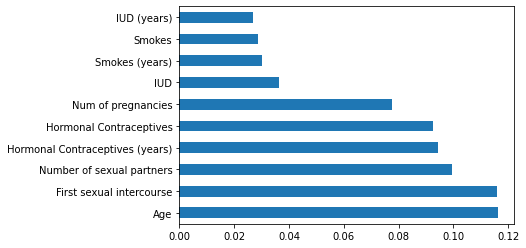

In [54]:

feature_nodel = ExtraTreesClassifier()
feature_nodel.fit(X_resampled_df,Y_resampled_df['have_cancer'])
print(feature_nodel.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(feature_nodel.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Creating Neural Network

In [55]:
nn_model_ten_features = Sequential()
nn_model_ten_features.add(Dense(60, input_dim=10, activation='relu'))
nn_model_ten_features.add(Dense(20, activation='relu'))
nn_model_ten_features.add(Dropout(0.5))
nn_model_ten_features.add(Dense(1, activation='sigmoid'))
# Compile model
nn_model_ten_features.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model_ten_features.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 60)                660       
_________________________________________________________________
dense_12 (Dense)             (None, 20)                1220      
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 21        
Total params: 1,901
Trainable params: 1,901
Non-trainable params: 0
_________________________________________________________________


In [56]:
####
# Creating top 10 features dataframe
####
X_ten_features=X_resampled_df[['Age' ,'Number of sexual partners','First sexual intercourse' , 'Hormonal Contraceptives' , 'Hormonal Contraceptives (years)','Num of pregnancies','Smokes' ,'Smokes (years)','IUD','IUD (years)']]

In [57]:
####
# Viewing top 10 features dataframe
####
X_ten_features

,Age,Number of sexual partners,First sexual intercourse,Hormonal Contraceptives,Hormonal Contraceptives (years),Num of pregnancies,Smokes,Smokes (years),IUD,IUD (years)
0,15.000000,1.000000,14.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0
1,34.000000,1.000000,-1.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0
2,52.000000,5.000000,16.000000,1.000000,3.000000,4.000000,1.0,37.000000,0.0,0.0
3,42.000000,3.000000,23.000000,0.000000,0.000000,2.000000,0.0,0.000000,0.0,0.0
4,44.000000,3.000000,26.000000,1.000000,2.000000,4.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1086,32.471034,2.924433,16.075567,1.000000,1.151133,3.622167,1.0,13.622167,0.0,0.0
1087,25.828841,2.342318,16.657682,0.828841,2.486523,-0.315364,1.0,8.657682,0.0,0.0
1088,31.371387,2.209538,17.000000,1.000000,9.161849,2.209538,1.0,9.209538,0.0,0.0
1089,29.951583,-0.951583,13.019367,0.000000,0.000000,3.000000,1.0,21.854750,0.0,0.0


In [58]:
####
# Training and testing NN model
####


X_train, X_test, Y_train, Y_test = train_test_split(X_ten_features, Y_resampled_df, test_size=0.3, random_state=0)
nn_model_ten_features.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss, test_acc_ten = nn_model_ten_features.evaluate(X_test, Y_test) 
y_pred1 = nn_model_ten_features.predict(X_test)
y_pred = np.round(y_pred1)


precision_ten_features= precision_score(Y_test, y_pred , average="binary",labels=np.unique(y_pred))
recall_ten_features = recall_score(Y_test, y_pred , average="binary")
F1_score_ten_features = f1_score(Y_test, y_pred , average="binary")
cm_ten_features = confusion_matrix(Y_test, y_pred)





accuracy_list.append(test_acc_ten)
precesion_list.append(precision_ten_features)
f1_score_list.append(F1_score_ten_features)
recall_list.append(recall_ten_features)
cm_list.append(cm_ten_features)

Epoch 1/50
763/763 [==============================] - 1s 1ms/step - loss: 1.4952 - accuracy: 0.5350
Epoch 2/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6667 - accuracy: 0.6221
Epoch 3/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6289 - accuracy: 0.6335
Epoch 4/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6134 - accuracy: 0.6623
Epoch 5/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5980 - accuracy: 0.6589
Epoch 6/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6247 - accuracy: 0.6577
Epoch 7/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6154 - accuracy: 0.6292
Epoch 8/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5690 - accuracy: 0.6849
Epoch 9/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5758 - accuracy: 0.6897
Epoch 10/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5863 - accuracy: 0.6839

## Creating CNN model

In [59]:
model_cnn_ten = Sequential([
  Conv1D(8, 3, input_shape=(10,1,), padding='same'),
  MaxPooling1D(pool_size=2,padding='same'),
  Flatten(),
  Dense(1, activation='sigmoid')
])
model_cnn_ten.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn_ten.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 10, 8)             32        
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 5, 8)              0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 40)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 41        
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [60]:
x_train_list = []
for index , item in X_ten_features.iterrows() : 
  item = np.expand_dims(item , axis =1)
  x_train_list.append(item)
X_numpy= np.array(x_train_list)
X_train, X_test, Y_train, Y_test = train_test_split(X_numpy, Y, test_size=0.3, random_state=0)
model_cnn_ten.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss_cnn_ten, test_acc_cnn_ten = model_cnn_ten.evaluate(X_test, Y_test) 
y_pred1 = model_cnn_ten.predict(X_test)
y_pred = np.round(y_pred1)


precision_cnn_ten= precision_score(Y_test, y_pred , average="macro")
recall_cnn_ten= recall_score(Y_test, y_pred , average="macro")
F1_score_cnn_ten = f1_score(Y_test, y_pred , average="macro")
cm_cnn_ten= confusion_matrix(Y_test, y_pred)


accuracy_list_cnn.append(test_acc_cnn_ten)
precesion_list_cnn.append(precision_cnn_ten)
f1_score_list_cnn.append(F1_score_cnn_ten)
recall_list_cnn.append(recall_cnn_ten)
cm_list_cnn.append(cm_cnn_ten)

Epoch 1/50
763/763 [==============================] - 1s 1ms/step - loss: 0.8002 - accuracy: 0.5391
Epoch 2/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6841 - accuracy: 0.5754
Epoch 3/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6556 - accuracy: 0.6265
Epoch 4/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6361 - accuracy: 0.6281
Epoch 5/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6299 - accuracy: 0.6206
Epoch 6/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6027 - accuracy: 0.6383
Epoch 7/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6360 - accuracy: 0.6356
Epoch 8/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6002 - accuracy: 0.6578
Epoch 9/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6048 - accuracy: 0.6485
Epoch 10/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6121 - accuracy: 0.6365

## Using top 15 Features

[0.11788402 0.10278384 0.11204057 0.07981745 0.03122403 0.03073711
 0.02676758 0.0939302  0.09172659 0.03023476 0.02911004 0.01544956
 0.01232537 0.01698908 0.01342641 0.00759175 0.01721748 0.00830988
 0.00799393 0.00807244 0.01436795 0.01026925 0.01201981 0.00913942
 0.00669187 0.00657619 0.00831458 0.00774968 0.02406311 0.00655638
 0.01938257 0.02123713]


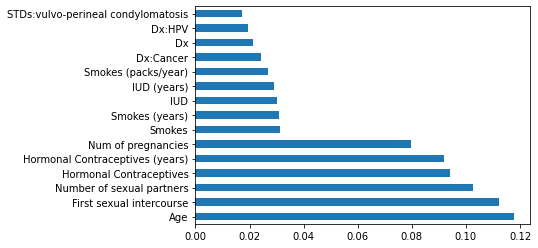

In [61]:

feature_nodel = ExtraTreesClassifier()
feature_nodel.fit(X_resampled_df,Y_resampled_df['have_cancer'])
print(feature_nodel.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(feature_nodel.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

## Creating NN Model

In [62]:
nn_model_15_features = Sequential()
nn_model_15_features.add(Dense(60, input_dim=15, activation='relu'))
nn_model_15_features.add(Dense(20, activation='relu'))
nn_model_15_features.add(Dropout(0.5))
nn_model_15_features.add(Dense(1, activation='sigmoid'))
# Compile model
nn_model_15_features.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model_15_features.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 60)                960       
_________________________________________________________________
dense_16 (Dense)             (None, 20)                1220      
_________________________________________________________________
dropout_4 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 21        
Total params: 2,201
Trainable params: 2,201
Non-trainable params: 0
_________________________________________________________________


In [63]:
####
# Getting the top 15 Feature in dataframe
####

X_15_features=X_resampled_df[feat_importances.nlargest(15).index]

In [64]:
####
# Viewing the top 15 Feature dataframe
####
X_15_features

,Age,First sexual intercourse,Number of sexual partners,Hormonal Contraceptives,Hormonal Contraceptives (years),Num of pregnancies,Smokes,Smokes (years),IUD,IUD (years),Smokes (packs/year),Dx:Cancer,Dx,Dx:HPV,STDs:vulvo-perineal condylomatosis
0,15.000000,14.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
1,34.000000,-1.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2,52.000000,16.000000,5.000000,1.000000,3.000000,4.000000,1.0,37.000000,0.0,0.0,37.000000,1.0,0.0,1.0,0.000000
3,42.000000,23.000000,3.000000,0.000000,0.000000,2.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
4,44.000000,26.000000,3.000000,1.000000,2.000000,4.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,32.471034,16.075567,2.924433,1.000000,1.151133,3.622167,1.0,13.622167,0.0,0.0,1.396222,0.0,0.0,0.0,0.075567
1087,25.828841,16.657682,2.342318,0.828841,2.486523,-0.315364,1.0,8.657682,0.0,0.0,1.238747,0.0,0.0,0.0,1.000000
1088,31.371387,17.000000,2.209538,1.000000,9.161849,2.209538,1.0,9.209538,0.0,0.0,1.130491,0.0,0.0,0.0,0.000000
1089,29.951583,13.019367,-0.951583,0.000000,0.000000,3.000000,1.0,21.854750,0.0,0.0,3.274823,0.0,0.0,0.0,0.009683


In [65]:

####
# Training and testing the NN model 
####

X_train, X_test, Y_train, Y_test = train_test_split(X_15_features, Y_resampled_df, test_size=0.3, random_state=0)
nn_model_15_features.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss, test_acc_15 = nn_model_15_features.evaluate(X_test, Y_test) 
y_pred1 = nn_model_15_features.predict(X_test)
y_pred = np.round(y_pred1)


precision_15_features= precision_score(Y_test, y_pred , average="binary",labels=np.unique(y_pred))
recall_15_features = recall_score(Y_test, y_pred , average="binary")
F1_score_15_features = f1_score(Y_test, y_pred , average="binary")
cm_15_features = confusion_matrix(Y_test, y_pred)



accuracy_list.append(test_acc_15)
precesion_list.append(precision_15_features)
f1_score_list.append(F1_score_15_features)
recall_list.append(recall_15_features)
cm_list.append(cm_15_features)

Epoch 1/50
763/763 [==============================] - 1s 1ms/step - loss: 1.1706 - accuracy: 0.5698
Epoch 2/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6530 - accuracy: 0.6495
Epoch 3/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6154 - accuracy: 0.6521
Epoch 4/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6090 - accuracy: 0.6908
Epoch 5/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6018 - accuracy: 0.6334
Epoch 6/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5826 - accuracy: 0.6861
Epoch 7/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5929 - accuracy: 0.6420
Epoch 8/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5901 - accuracy: 0.6980
Epoch 9/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5316 - accuracy: 0.7458
Epoch 10/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5558 - accuracy: 0.6987

## Creating the CNN Model

In [66]:
model_cnn_15 = Sequential([
  Conv1D(8, 3, input_shape=(15,1,), padding='same'),
  MaxPooling1D(pool_size=2,padding='same'),
  Flatten(),
  Dense(1, activation='sigmoid')
])
model_cnn_15.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn_15.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 15, 8)             32        
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 8, 8)              0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 65        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [67]:
x_train_list = []
for index , item in X_15_features.iterrows() : 
  item = np.expand_dims(item , axis =1)
  x_train_list.append(item)
X_numpy= np.array(x_train_list)
X_train, X_test, Y_train, Y_test = train_test_split(X_numpy, Y, test_size=0.3, random_state=0)
model_cnn_15.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss_cnn_15, test_acc_cnn_15 = model_cnn_15.evaluate(X_test, Y_test) 
y_pred1 = model_cnn_15.predict(X_test)
y_pred = np.round(y_pred1)


precision_cnn_15= precision_score(Y_test, y_pred , average="macro")
recall_cnn_15= recall_score(Y_test, y_pred , average="macro")
F1_score_cnn_15 = f1_score(Y_test, y_pred , average="macro")
cm_cnn_15= confusion_matrix(Y_test, y_pred)


accuracy_list_cnn.append(test_acc_cnn_15)
precesion_list_cnn.append(precision_cnn_15)
f1_score_list_cnn.append(F1_score_cnn_15)
recall_list_cnn.append(recall_cnn_15)
cm_list_cnn.append(cm_cnn_15)

Epoch 1/50
763/763 [==============================] - 1s 1ms/step - loss: 0.9173 - accuracy: 0.5930
Epoch 2/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6407 - accuracy: 0.6116
Epoch 3/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6217 - accuracy: 0.6595
Epoch 4/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5671 - accuracy: 0.7068
Epoch 5/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5903 - accuracy: 0.6662
Epoch 6/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5726 - accuracy: 0.6785
Epoch 7/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5698 - accuracy: 0.6891
Epoch 8/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5534 - accuracy: 0.6931
Epoch 9/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5559 - accuracy: 0.7050
Epoch 10/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5329 - accuracy: 0.7303

## Using Top 20 Features 

[0.11831509 0.09893765 0.11734021 0.07914026 0.02904029 0.03248681
 0.02638497 0.09624455 0.08918442 0.03623612 0.02942077 0.01253299
 0.0090201  0.01399048 0.01396731 0.012      0.01630115 0.00892916
 0.01126302 0.0061595  0.01351182 0.00859504 0.01312581 0.00402547
 0.00975065 0.00568323 0.00918247 0.00693364 0.02363677 0.00764394
 0.02355988 0.01745642]


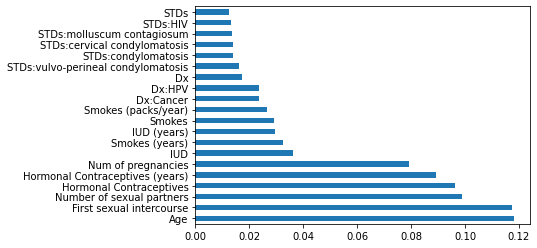

In [68]:

feature_nodel = ExtraTreesClassifier()
feature_nodel.fit(X_resampled_df,Y_resampled_df['have_cancer'])
print(feature_nodel.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(feature_nodel.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Creating Neural Network

In [69]:
nn_model_20_features = Sequential()
nn_model_20_features.add(Dense(60, input_dim=20, activation='relu'))
nn_model_20_features.add(Dense(20, activation='relu'))
nn_model_20_features.add(Dropout(0.5))
nn_model_20_features.add(Dense(1, activation='sigmoid'))
# Compile model
nn_model_20_features.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model_20_features.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 60)                1260      
_________________________________________________________________
dense_20 (Dense)             (None, 20)                1220      
_________________________________________________________________
dropout_5 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 21        
Total params: 2,501
Trainable params: 2,501
Non-trainable params: 0
_________________________________________________________________


In [70]:
###
#Creating top 20 Features Dataframe
####

X_20_features=X_resampled_df[feat_importances.nlargest(20).index]

In [71]:
###
#Viewing top 20 Features Dataframe
####

X_20_features

,Age,First sexual intercourse,Number of sexual partners,Hormonal Contraceptives,Hormonal Contraceptives (years),Num of pregnancies,IUD,Smokes (years),IUD (years),Smokes,Smokes (packs/year),Dx:Cancer,Dx:HPV,Dx,STDs:vulvo-perineal condylomatosis,STDs:condylomatosis,STDs:cervical condylomatosis,STDs:molluscum contagiosum,STDs:HIV,STDs
0,15.000000,14.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
1,34.000000,-1.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
2,52.000000,16.000000,5.000000,1.000000,3.000000,4.000000,0.0,37.000000,0.0,1.0,37.000000,1.0,1.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
3,42.000000,23.000000,3.000000,0.000000,0.000000,2.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
4,44.000000,26.000000,3.000000,1.000000,2.000000,4.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,32.471034,16.075567,2.924433,1.000000,1.151133,3.622167,0.0,13.622167,0.0,1.0,1.396222,0.0,0.0,0.0,0.075567,0.075567,0.0,0.0,0.924433,1.0
1087,25.828841,16.657682,2.342318,0.828841,2.486523,-0.315364,0.0,8.657682,0.0,1.0,1.238747,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,0.000000,1.0
1088,31.371387,17.000000,2.209538,1.000000,9.161849,2.209538,0.0,9.209538,0.0,1.0,1.130491,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
1089,29.951583,13.019367,-0.951583,0.000000,0.000000,3.000000,0.0,21.854750,0.0,1.0,3.274823,0.0,0.0,0.0,0.009683,0.009683,0.0,0.0,0.990317,1.0


In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X_20_features, Y_resampled_df, test_size=0.3, random_state=0)
nn_model_20_features.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss, test_acc_20 = nn_model_20_features.evaluate(X_test, Y_test) 
y_pred1 = nn_model_20_features.predict(X_test)
y_pred = np.round(y_pred1)

precision_20_features= precision_score(Y_test, y_pred , average="binary",labels=np.unique(y_pred))
recall_20_features = recall_score(Y_test, y_pred , average="binary")
F1_score_20_features = f1_score(Y_test, y_pred , average="binary")
cm_20_features = confusion_matrix(Y_test, y_pred)






accuracy_list.append(test_acc_20)
precesion_list.append(precision_20_features)
f1_score_list.append(F1_score_20_features)
recall_list.append(recall_20_features)
cm_list.append(cm_20_features)

Epoch 1/50
763/763 [==============================] - 1s 1ms/step - loss: 1.0025 - accuracy: 0.5320
Epoch 2/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6532 - accuracy: 0.6378
Epoch 3/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6446 - accuracy: 0.6466
Epoch 4/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6100 - accuracy: 0.6647
Epoch 5/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5830 - accuracy: 0.6905
Epoch 6/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5598 - accuracy: 0.6898
Epoch 7/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5353 - accuracy: 0.7088
Epoch 8/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5552 - accuracy: 0.6934
Epoch 9/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5628 - accuracy: 0.6842
Epoch 10/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5543 - accuracy: 0.7102

## Creating CNN Model

In [73]:
model_cnn_20 = Sequential([
  Conv1D(8, 3, input_shape=(20,1,), padding='same'),
  MaxPooling1D(pool_size=2,padding='same'),
  Flatten(),
  Dense(1, activation='sigmoid')
])
model_cnn_20.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn_20.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 20, 8)             32        
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 10, 8)             0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 80)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 81        
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [74]:
x_train_list = []
for index , item in X_20_features.iterrows() : 
  item = np.expand_dims(item , axis =1)
  x_train_list.append(item)
X_numpy= np.array(x_train_list)
X_train, X_test, Y_train, Y_test = train_test_split(X_numpy, Y, test_size=0.3, random_state=0)
model_cnn_20.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss_cnn_20, test_acc_cnn_20 = model_cnn_20.evaluate(X_test, Y_test) 
y_pred1 = model_cnn_20.predict(X_test)
y_pred = np.round(y_pred1)


precision_cnn_20= precision_score(Y_test, y_pred , average="macro")
recall_cnn_20= recall_score(Y_test, y_pred , average="macro")
F1_score_cnn_20 = f1_score(Y_test, y_pred , average="macro")
cm_cnn_20= confusion_matrix(Y_test, y_pred)


accuracy_list_cnn.append(test_acc_cnn_20)
precesion_list_cnn.append(precision_cnn_20)
f1_score_list_cnn.append(F1_score_cnn_20)
recall_list_cnn.append(recall_cnn_20)
cm_list_cnn.append(cm_cnn_20)

Epoch 1/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6465 - accuracy: 0.6414
Epoch 2/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5948 - accuracy: 0.6373
Epoch 3/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5655 - accuracy: 0.6806
Epoch 4/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5486 - accuracy: 0.6872
Epoch 5/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5472 - accuracy: 0.6978
Epoch 6/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5151 - accuracy: 0.6955
Epoch 7/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5338 - accuracy: 0.6965
Epoch 8/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5142 - accuracy: 0.7070
Epoch 9/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5251 - accuracy: 0.7142
Epoch 10/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5280 - accuracy: 0.7347

## Using Top 25 Features

[0.12075275 0.09930298 0.11416995 0.0818443  0.02835705 0.03496829
 0.02592781 0.08797238 0.09404456 0.03404788 0.0250978  0.02037902
 0.01073196 0.01390522 0.00916979 0.01122612 0.01756312 0.01000558
 0.00689996 0.00648746 0.01009305 0.01044547 0.01242171 0.01175275
 0.00950972 0.00651746 0.00722997 0.00870303 0.02448396 0.00705827
 0.02022305 0.01870756]


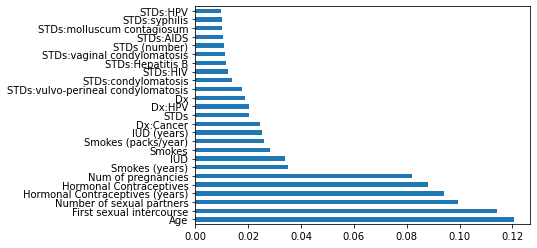

In [75]:

feature_nodel = ExtraTreesClassifier()
feature_nodel.fit(X_resampled_df,Y_resampled_df['have_cancer'])
print(feature_nodel.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(feature_nodel.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

## Creating Neural Network

In [76]:
nn_model_25_features = Sequential()
nn_model_25_features.add(Dense(60, input_dim=25, activation='relu'))
nn_model_25_features.add(Dense(20, activation='relu'))
nn_model_25_features.add(Dropout(0.5))
nn_model_25_features.add(Dense(1, activation='sigmoid'))
# Compile model
nn_model_25_features.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model_25_features.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 60)                1560      
_________________________________________________________________
dense_24 (Dense)             (None, 20)                1220      
_________________________________________________________________
dropout_6 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 21        
Total params: 2,801
Trainable params: 2,801
Non-trainable params: 0
_________________________________________________________________


In [77]:
###
#Creating top 25 features dataframe
###
X_25_features=X_resampled_df[feat_importances.nlargest(25).index]

In [78]:
###
#Viewing top 25 features dataframe
###
X_25_features

,Age,First sexual intercourse,Number of sexual partners,Hormonal Contraceptives (years),Hormonal Contraceptives,Num of pregnancies,Smokes (years),IUD,Smokes,Smokes (packs/year),IUD (years),Dx:Cancer,STDs,Dx:HPV,Dx,STDs:vulvo-perineal condylomatosis,STDs:condylomatosis,STDs:HIV,STDs:Hepatitis B,STDs:vaginal condylomatosis,STDs (number),STDs:AIDS,STDs:molluscum contagiosum,STDs:syphilis,STDs:HPV
0,15.000000,14.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,34.000000,-1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,52.000000,16.000000,5.000000,3.000000,1.000000,4.000000,37.000000,0.0,1.0,37.000000,0.0,1.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,42.000000,23.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,44.000000,26.000000,3.000000,2.000000,1.000000,4.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,32.471034,16.075567,2.924433,1.151133,1.000000,3.622167,13.622167,0.0,1.0,1.396222,0.0,0.0,1.0,0.0,0.0,0.075567,0.075567,0.924433,0.0,0.0,1.075567,0.0,0.0,0.0,0.0
1087,25.828841,16.657682,2.342318,2.486523,0.828841,-0.315364,8.657682,0.0,1.0,1.238747,0.0,0.0,1.0,0.0,0.0,1.000000,1.000000,0.000000,0.0,0.0,2.000000,0.0,0.0,0.0,0.0
1088,31.371387,17.000000,2.209538,9.161849,1.000000,2.209538,9.209538,0.0,1.0,1.130491,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1089,29.951583,13.019367,-0.951583,0.000000,0.000000,3.000000,21.854750,0.0,1.0,3.274823,0.0,0.0,1.0,0.0,0.0,0.009683,0.009683,0.990317,0.0,0.0,1.009683,0.0,0.0,0.0,0.0


In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X_25_features, Y_resampled_df, test_size=0.3, random_state=0)
nn_model_25_features.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss, test_acc_25 = nn_model_25_features.evaluate(X_test, Y_test) 
y_pred1 = nn_model_25_features.predict(X_test)
y_pred = np.round(y_pred1)

precision_25_features= precision_score(Y_test, y_pred , average="binary",labels=np.unique(y_pred))
recall_25_features = recall_score(Y_test, y_pred , average="binary")
F1_score_25_features = f1_score(Y_test, y_pred , average="binary")
cm_25_features = confusion_matrix(Y_test, y_pred)




accuracy_list.append(test_acc_25)
precesion_list.append(precision_25_features)
f1_score_list.append(F1_score_25_features)
recall_list.append(recall_25_features)
cm_list.append(cm_25_features)

Epoch 1/50
763/763 [==============================] - 1s 1ms/step - loss: 0.9285 - accuracy: 0.5722
Epoch 2/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5897 - accuracy: 0.6799
Epoch 3/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6004 - accuracy: 0.6653
Epoch 4/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5574 - accuracy: 0.6799
Epoch 5/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5553 - accuracy: 0.6882
Epoch 6/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5396 - accuracy: 0.6850
Epoch 7/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5663 - accuracy: 0.6667
Epoch 8/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5454 - accuracy: 0.6612
Epoch 9/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5192 - accuracy: 0.7117
Epoch 10/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5363 - accuracy: 0.6759

## Creating CNN Model

In [80]:
model_cnn_25 = Sequential([
  Conv1D(8, 3, input_shape=(25,1,), padding='same'),
  MaxPooling1D(pool_size=2,padding='same'),
  Flatten(),
  Dense(1, activation='sigmoid')
])
model_cnn_25.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn_25.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 25, 8)             32        
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 13, 8)             0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 104)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 105       
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


In [81]:
x_train_list = []
for index , item in X_25_features.iterrows() : 
  item = np.expand_dims(item , axis =1)
  x_train_list.append(item)
X_numpy= np.array(x_train_list)
X_train, X_test, Y_train, Y_test = train_test_split(X_numpy, Y, test_size=0.3, random_state=0)
model_cnn_25.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss_cnn_25, test_acc_cnn_25 = model_cnn_25.evaluate(X_test, Y_test) 
y_pred1 = model_cnn_25.predict(X_test)
y_pred = np.round(y_pred1)


precision_cnn_25= precision_score(Y_test, y_pred , average="macro")
recall_cnn_25= recall_score(Y_test, y_pred , average="macro")
F1_score_cnn_25 = f1_score(Y_test, y_pred , average="macro")
cm_cnn_25= confusion_matrix(Y_test, y_pred)


accuracy_list_cnn.append(test_acc_cnn_25)
precesion_list_cnn.append(precision_cnn_25)
f1_score_list_cnn.append(F1_score_cnn_25)
recall_list_cnn.append(recall_cnn_25)
cm_list_cnn.append(cm_cnn_25)

Epoch 1/50
763/763 [==============================] - 1s 1ms/step - loss: 0.8414 - accuracy: 0.5757
Epoch 2/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5704 - accuracy: 0.6550
Epoch 3/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5282 - accuracy: 0.7170
Epoch 4/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5443 - accuracy: 0.6691
Epoch 5/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5032 - accuracy: 0.7146
Epoch 6/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5035 - accuracy: 0.7020
Epoch 7/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4870 - accuracy: 0.7293
Epoch 8/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4997 - accuracy: 0.7392
Epoch 9/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5119 - accuracy: 0.6922
Epoch 10/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5310 - accuracy: 0.6911

## Using all Features

[0.11733204 0.10030121 0.11611275 0.07755287 0.02912001 0.03105678
 0.02708707 0.09259728 0.08629318 0.04018348 0.02700005 0.01865086
 0.01002183 0.01253425 0.0082817  0.01422314 0.01497167 0.01151846
 0.01048749 0.00701844 0.00734191 0.00881033 0.01186076 0.01242853
 0.01253578 0.00553387 0.00756241 0.00893372 0.02115905 0.0061373
 0.0227433  0.02260847]


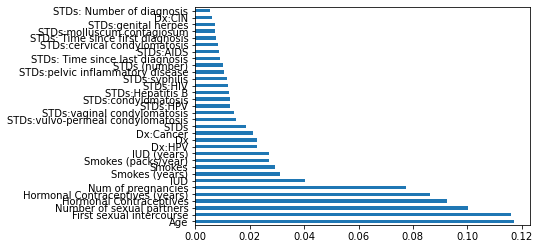

In [82]:

feature_nodel = ExtraTreesClassifier()
feature_nodel.fit(X_resampled_df,Y_resampled_df['have_cancer'])
print(feature_nodel.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(feature_nodel.feature_importances_, index=X.columns)
feat_importances.nlargest(32).plot(kind='barh')
plt.show()

## Creating Neural Network

In [83]:
nn_model_all_features = Sequential()
nn_model_all_features.add(Dense(60, input_dim=32, activation='relu'))
nn_model_all_features.add(Dense(20, activation='relu'))
nn_model_all_features.add(Dropout(0.5))
nn_model_all_features.add(Dense(1, activation='sigmoid'))
# Compile model
nn_model_all_features.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model_all_features.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 60)                1980      
_________________________________________________________________
dense_28 (Dense)             (None, 20)                1220      
_________________________________________________________________
dropout_7 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 21        
Total params: 3,221
Trainable params: 3,221
Non-trainable params: 0
_________________________________________________________________


In [84]:
###
# Viewing all features dataframe
###
X_resampled_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
0,15.000000,1.000000,14.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-1.000000,-1.000000,0.0,0.0,0.0,0.0
1,34.000000,1.000000,-1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-1.000000,-1.000000,0.0,0.0,0.0,0.0
2,52.000000,5.000000,16.000000,4.000000,1.0,37.000000,37.000000,1.000000,3.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-1.000000,-1.000000,1.0,0.0,1.0,0.0
3,42.000000,3.000000,23.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-1.000000,-1.000000,0.0,0.0,0.0,0.0
4,44.000000,3.000000,26.000000,4.000000,0.0,0.000000,0.000000,1.000000,2.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-1.000000,-1.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,32.471034,2.924433,16.075567,3.622167,1.0,13.622167,1.396222,1.000000,1.151133,0.0,0.0,1.0,1.075567,0.075567,0.0,0.0,0.075567,0.0,0.0,0.0,0.0,0.0,0.924433,0.0,0.0,1.0,15.319901,15.319901,0.0,0.0,0.0,0.0
1087,25.828841,2.342318,16.657682,-0.315364,1.0,8.657682,1.238747,0.828841,2.486523,0.0,0.0,1.0,2.000000,1.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,6.657682,6.657682,0.0,0.0,0.0,0.0
1088,31.371387,2.209538,17.000000,2.209538,1.0,9.209538,1.130491,1.000000,9.161849,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-1.000000,-1.000000,0.0,0.0,0.0,0.0
1089,29.951583,-0.951583,13.019367,3.000000,1.0,21.854750,3.274823,0.000000,0.000000,0.0,0.0,1.0,1.009683,0.009683,0.0,0.0,0.009683,0.0,0.0,0.0,0.0,0.0,0.990317,0.0,0.0,1.0,3.019367,3.019367,0.0,0.0,0.0,0.0


In [85]:
####
#Training and testing the model
####

X_train, X_test, Y_train, Y_test = train_test_split(X_resampled_df, Y_resampled_df, test_size=0.3, random_state=0,shuffle = True)
nn_model_all_features.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss, test_acc_all = nn_model_all_features.evaluate(X_test, Y_test) 
y_pred1 = nn_model_all_features.predict(X_test)
y_pred = np.round(y_pred1)


precision_all_features= precision_score(Y_test, y_pred , average="binary",labels=np.unique(y_pred))
recall_all_features = recall_score(Y_test, y_pred , average="binary")
F1_score_all_features = f1_score(Y_test, y_pred , average="binary")
cm_all_features = confusion_matrix(Y_test, y_pred)



accuracy_list.append(test_acc_all)
precesion_list.append(precision_all_features)
f1_score_list.append(F1_score_all_features)
recall_list.append(recall_all_features)
cm_list.append(cm_all_features)

Epoch 1/50
763/763 [==============================] - 1s 1ms/step - loss: 1.0067 - accuracy: 0.5645
Epoch 2/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5876 - accuracy: 0.6709
Epoch 3/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6317 - accuracy: 0.6550
Epoch 4/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5771 - accuracy: 0.6952
Epoch 5/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5686 - accuracy: 0.6976
Epoch 6/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5301 - accuracy: 0.7388
Epoch 7/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5503 - accuracy: 0.6890
Epoch 8/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5554 - accuracy: 0.6990
Epoch 9/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5210 - accuracy: 0.7133
Epoch 10/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5140 - accuracy: 0.6971

In [86]:
x_train_list = []
for index , item in X_resampled_df.iterrows() : 
  item = np.expand_dims(item , axis =1)
  x_train_list.append(item)
X_numpy= np.array(x_train_list)
X_train, X_test, Y_train, Y_test = train_test_split(X_numpy, Y, test_size=0.3, random_state=0)
model.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss_cnn_all, test_acc_cnn_all = model.evaluate(X_test, Y_test) 
y_pred1 = model.predict(X_test)
y_pred = np.round(y_pred1)


precision_cnn_all= precision_score(Y_test, y_pred , average="macro")
recall_cnn_all = recall_score(Y_test, y_pred , average="macro")
F1_score_cnn_all = f1_score(Y_test, y_pred , average="macro")
cm_cnn_all = confusion_matrix(Y_test, y_pred)


accuracy_list_cnn.append(test_acc_cnn_all)
precesion_list_cnn.append(precision_cnn_all)
f1_score_list_cnn.append(F1_score_cnn_all)
recall_list_cnn.append(recall_cnn_all)
cm_list_cnn.append(cm_cnn_all)

Epoch 1/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4434 - accuracy: 0.7693
Epoch 2/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4415 - accuracy: 0.7667
Epoch 3/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4459 - accuracy: 0.7628
Epoch 4/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4330 - accuracy: 0.7759
Epoch 5/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4416 - accuracy: 0.7733
Epoch 6/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4387 - accuracy: 0.7772
Epoch 7/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4386 - accuracy: 0.7706
Epoch 8/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4409 - accuracy: 0.7772
Epoch 9/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4379 - accuracy: 0.7667
Epoch 10/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4431 - accuracy: 0.7759

## Evaluating Results

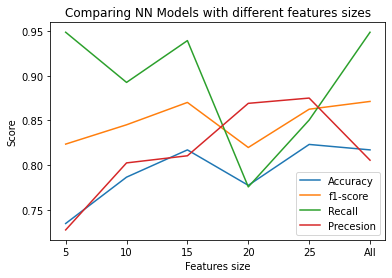

In [87]:
###
#Plotting accuracy of model using different sizes 
###
xAxis = [5,10,15,20,25,'All']
plt.plot(xAxis,accuracy_list, label = "Accuracy")
plt.plot(xAxis,f1_score_list, label = "f1-score")
plt.plot(xAxis,recall_list, label = "Recall")
plt.plot(xAxis,precesion_list, label = "Precesion")

plt.title('Comparing NN Models with different features sizes')
plt.xlabel('Features size')
plt.ylabel('Score')
plt.legend()
plt.show()




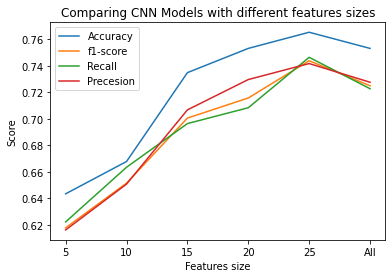

In [88]:
###
#Plotting accuracy of model using different sizes 
###
xAxis = [5,10,15,20,25,'All']
plt.plot(xAxis,accuracy_list_cnn, label = "Accuracy")
plt.plot(xAxis,f1_score_list_cnn, label = "f1-score")
plt.plot(xAxis,recall_list_cnn, label = "Recall")
plt.plot(xAxis,precesion_list_cnn, label = "Precesion")

plt.title('Comparing CNN Models with different features sizes')
plt.xlabel('Features size')
plt.ylabel('Score')
plt.legend()
plt.show()




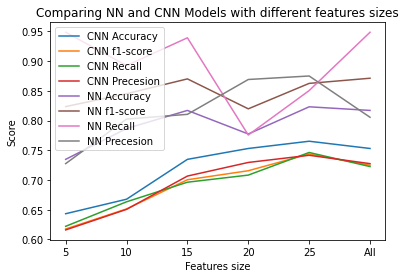

<Figure size 144x72 with 0 Axes>

In [89]:
###
#Plotting accuracy of model using different sizes 
###
xAxis = [5,10,15,20,25,'All']
plt.plot(xAxis,accuracy_list_cnn, label = "CNN Accuracy")
plt.plot(xAxis,f1_score_list_cnn, label = "CNN f1-score")
plt.plot(xAxis,recall_list_cnn, label = "CNN Recall")
plt.plot(xAxis,precesion_list_cnn, label = "CNN Precesion")

plt.plot(xAxis,accuracy_list, label = "NN Accuracy")
plt.plot(xAxis,f1_score_list, label = "NN f1-score")
plt.plot(xAxis,recall_list, label = "NN Recall")
plt.plot(xAxis,precesion_list, label = "NN Precesion")


plt.title('Comparing NN and CNN Models with different features sizes')
plt.xlabel('Features size')
plt.ylabel('Score')
plt.legend();
plt.figure(figsize=(2,1)) ; 
plt.show();




## Confusion Matrix

In [90]:
feature_sizes = [5,10,15,20,25,'All']
print( 'NN Models ' )
for feature_size , confusion_matrix in zip(feature_sizes ,cm_list):
  print( 'size' , feature_size )
  print( 'confusion matrix ' )
  print(confusion_matrix)
  print('-----')
print('------------------')
print('------------------')
print('------------------')
print( 'CNN Models ' )
for feature_size , confusion_matrix in zip(feature_sizes ,cm_list_cnn):
  print( 'size' , feature_size )
  print( 'confusion matrix ' )
  print(confusion_matrix)
  print('-----')

NN Models 
size 5
confusion matrix 
[[ 38  76]
 [ 11 203]]
-----
size 10
confusion matrix 
[[ 67  47]
 [ 23 191]]
-----
size 15
confusion matrix 
[[ 67  47]
 [ 13 201]]
-----
size 20
confusion matrix 
[[ 89  25]
 [ 48 166]]
-----
size 25
confusion matrix 
[[ 88  26]
 [ 32 182]]
-----
size All
confusion matrix 
[[ 65  49]
 [ 11 203]]
-----
------------------
------------------
------------------
CNN Models 
size 5
confusion matrix 
[[ 63  51]
 [ 66 148]]
-----
size 10
confusion matrix 
[[ 74  40]
 [ 69 145]]
-----
size 15
confusion matrix 
[[ 65  49]
 [ 38 176]]
-----
size 20
confusion matrix 
[[ 64  50]
 [ 31 183]]
-----
size 25
confusion matrix 
[[ 78  36]
 [ 41 173]]
-----
size All
confusion matrix 
[[ 71  43]
 [ 38 176]]
-----


# Feature Binning and Discretization

In [91]:
X_resampled_df_1 = X_resampled_df.copy()

Best Columns to make discretization upon is 
- Age	
- Number of sexual partners	
- First sexual intercourse	
- Num of pregnancies

## Using pandas qcut functionality to make the transform
<img src = 'https://i.stack.imgur.com/pObHa.png'>

In [92]:
X_resampled_df_1['Age'] = pd.qcut(X_resampled_df_1['Age'], 10, labels=False)
X_resampled_df_1['Number of sexual partners'] = X_resampled_df_1['Number of sexual partners'].rank(method='first')
X_resampled_df_1['Number of sexual partners'] = pd.qcut(X_resampled_df_1['Number of sexual partners'], 10, labels=False)
X_resampled_df_1['First sexual intercourse'] = X_resampled_df_1['First sexual intercourse'].rank(method='first')
X_resampled_df_1['First sexual intercourse'] = pd.qcut(X_resampled_df_1['First sexual intercourse'], 10, labels=False)
X_resampled_df_1['Num of pregnancies'] = X_resampled_df_1['Num of pregnancies'].rank(method='first')
X_resampled_df_1['Num of pregnancies'] = pd.qcut(X_resampled_df_1['Num of pregnancies'], 10, labels=False)

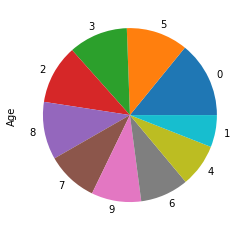

In [93]:
X_resampled_df_1.Age.value_counts().plot(kind='pie')

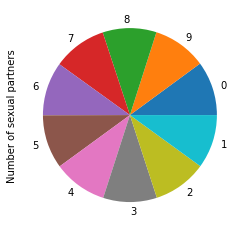

In [94]:
X_resampled_df_1['Number of sexual partners'].value_counts().plot(kind='pie')


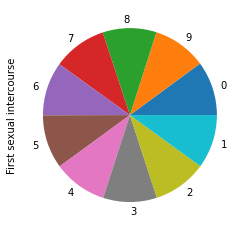

In [95]:
X_resampled_df_1['First sexual intercourse'].value_counts().plot(kind='pie')


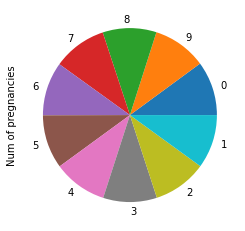

In [96]:
X_resampled_df_1['Num of pregnancies'].value_counts().plot(kind='pie')

## <font color = 'orange'>Feature Importance
- We can get the feature importance of each feature of our dataset by using the feature importance property of the model.<br>
- Feature importance gives us a score for each feature of our data, the higher the score more important or relevant is the feature towards our output variable.<br>
- Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.



In [97]:
from sklearn.metrics import confusion_matrix
accuracy_list_discretization=[]
precesion_list_discretization=[]
f1_score_list_discretization=[]
recall_list_discretization=[]
cm_list_discretization=[]


accuracy_list_discretization_cnn=[]
precesion_list_discretization_cnn=[]
f1_score_list_discretization_cnn=[]
recall_list_discretization_cnn=[]
cm_list_discretization_cnn=[]

## Using top 5 Features

[0.08888527 0.1520364  0.10103031 0.10883909 0.03151297 0.0287867
 0.02851406 0.07269178 0.07980144 0.03245434 0.02803246 0.01501734
 0.01472493 0.01582002 0.00447447 0.00887267 0.01533077 0.00803373
 0.01271277 0.00763461 0.00947444 0.01177952 0.01131183 0.00537367
 0.01320819 0.00636166 0.01035358 0.00718086 0.01924751 0.00852728
 0.02302488 0.01895046]


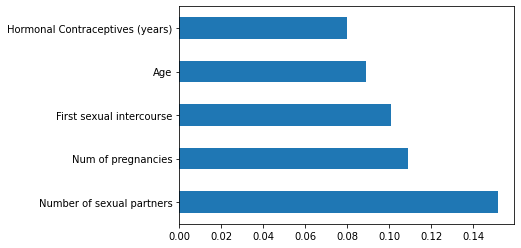

In [98]:

feature_nodel = ExtraTreesClassifier()
feature_nodel.fit(X_resampled_df_1,Y_resampled_df['have_cancer'])
print(feature_nodel.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(feature_nodel.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

## Build Neural Network 

In [99]:
nn_model_five_features = Sequential()
nn_model_five_features.add(Dense(60, input_dim=5, activation='relu'))
nn_model_five_features.add(Dense(20, activation='relu'))
nn_model_five_features.add(Dropout(0.5))
nn_model_five_features.add(Dense(1, activation='sigmoid'))
# Compile model
nn_model_five_features.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model_five_features.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 60)                360       
_________________________________________________________________
dense_31 (Dense)             (None, 20)                1220      
_________________________________________________________________
dropout_8 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 21        
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


In [100]:
###
#Create Dataframe of top five features
####
X_five_features=X_resampled_df_1[['Age' ,'Number of sexual partners','First sexual intercourse' , 'Hormonal Contraceptives' , 'Hormonal Contraceptives (years)' ]]

In [101]:
###
#View Dataframe of top five features
####
X_five_features

,Age,Number of sexual partners,First sexual intercourse,Hormonal Contraceptives,Hormonal Contraceptives (years)
0,0,0,0,0.000000,0.000000
1,8,0,0,0.000000,0.000000
2,9,9,3,1.000000,3.000000
3,9,6,9,0.000000,0.000000
4,9,6,9,1.000000,2.000000
...,...,...,...,...,...
1086,7,6,4,1.000000,1.151133
1087,5,5,4,0.828841,2.486523
1088,7,5,6,1.000000,9.161849
1089,6,0,0,0.000000,0.000000


In [102]:

####
# Train and test NN model 
####

X_train, X_test, Y_train, Y_test = train_test_split(X_five_features, Y_resampled_df, test_size=0.3, random_state=0)
nn_model_five_features.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss, test_acc_five = nn_model_five_features.evaluate(X_test, Y_test) 
y_pred1 = nn_model_five_features.predict(X_test)
y_pred = np.round(y_pred1)

precision_five_features= precision_score(Y_test, y_pred , average="binary",labels=np.unique(y_pred))
recall_five_features = recall_score(Y_test, y_pred , average="binary")
F1_score_five_features = f1_score(Y_test, y_pred , average="binary")
cm_five_features = confusion_matrix(Y_test.to_numpy(), y_pred)



accuracy_list_discretization.append(test_acc_five)
precesion_list_discretization.append(precision_five_features)
f1_score_list_discretization.append(F1_score_five_features)
recall_list_discretization.append(recall_five_features)
cm_list_discretization.append(cm_five_features)

Epoch 1/50
763/763 [==============================] - 1s 1ms/step - loss: 0.7136 - accuracy: 0.6205
Epoch 2/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6102 - accuracy: 0.6770
Epoch 3/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5990 - accuracy: 0.6687
Epoch 4/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5692 - accuracy: 0.6994
Epoch 5/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5688 - accuracy: 0.7206
Epoch 6/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5457 - accuracy: 0.7583
Epoch 7/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5152 - accuracy: 0.7584
Epoch 8/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5131 - accuracy: 0.7733
Epoch 9/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5231 - accuracy: 0.7570
Epoch 10/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5141 - accuracy: 0.7668

## Create CNN Model

In [103]:
model_cnn_five = Sequential([
  Conv1D(8, 3, input_shape=(5,1,), padding='same'),
  MaxPooling1D(pool_size=2,padding='same'),
  Flatten(),
  Dense(1, activation='sigmoid')
])
model_cnn_five.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn_five.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 5, 8)              32        
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 3, 8)              0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 24)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 25        
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [104]:

###
# Train and test CNN model 
###


x_train_list = []
for index , item in X_five_features.iterrows() : 
  item = np.expand_dims(item , axis =1)
  x_train_list.append(item)
X_numpy= np.array(x_train_list)
X_train, X_test, Y_train, Y_test = train_test_split(X_numpy, Y, test_size=0.3, random_state=0)
model_cnn_five.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss_cnn_five, test_acc_cnn_five = model_cnn_five.evaluate(X_test, Y_test) 
y_pred1 = model_cnn_five.predict(X_test)
y_pred = np.round(y_pred1)


precision_cnn_five= precision_score(Y_test, y_pred , average="macro")
recall_cnn_five = recall_score(Y_test, y_pred , average="macro")
F1_score_cnn_five = f1_score(Y_test, y_pred , average="macro")
cm_cnn_five= confusion_matrix(Y_test, y_pred)


accuracy_list_discretization_cnn.append(test_acc_cnn_five)
precesion_list_discretization_cnn.append(precision_cnn_five)
f1_score_list_discretization_cnn.append(F1_score_cnn_five)
recall_list_discretization_cnn.append(recall_cnn_five)
cm_list_discretization_cnn.append(cm_cnn_five)

Epoch 1/50
763/763 [==============================] - 1s 1ms/step - loss: 0.7599 - accuracy: 0.4982
Epoch 2/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6877 - accuracy: 0.5610
Epoch 3/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6571 - accuracy: 0.6164
Epoch 4/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6279 - accuracy: 0.6744
Epoch 5/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6197 - accuracy: 0.6785
Epoch 6/50
763/763 [==============================] - 1s 993us/step - loss: 0.6177 - accuracy: 0.7151
Epoch 7/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6028 - accuracy: 0.7281
Epoch 8/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6066 - accuracy: 0.6963
Epoch 9/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6027 - accuracy: 0.7340
Epoch 10/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6230 - accuracy: 0.68

## Using Top 10 Features

[0.08623408 0.15791898 0.09822775 0.11016383 0.0287522  0.02983042
 0.02875539 0.07583748 0.07777674 0.03073147 0.02606927 0.01348102
 0.0121089  0.00963527 0.01058922 0.01006414 0.01349913 0.00904609
 0.0147176  0.00434408 0.00874924 0.0135151  0.01042178 0.0112148
 0.01529003 0.00890614 0.00877161 0.00735572 0.02034346 0.00864421
 0.01931082 0.01969406]


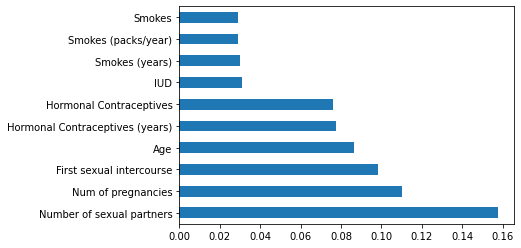

In [105]:

feature_nodel = ExtraTreesClassifier()
feature_nodel.fit(X_resampled_df_1,Y_resampled_df['have_cancer'])
print(feature_nodel.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(feature_nodel.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Creating Neural Network

In [106]:
nn_model_ten_features = Sequential()
nn_model_ten_features.add(Dense(60, input_dim=10, activation='relu'))
nn_model_ten_features.add(Dense(20, activation='relu'))
nn_model_ten_features.add(Dropout(0.5))
nn_model_ten_features.add(Dense(1, activation='sigmoid'))
# Compile model
nn_model_ten_features.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model_ten_features.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 60)                660       
_________________________________________________________________
dense_35 (Dense)             (None, 20)                1220      
_________________________________________________________________
dropout_9 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 21        
Total params: 1,901
Trainable params: 1,901
Non-trainable params: 0
_________________________________________________________________


In [107]:
####
# Creating top 10 features dataframe
####
X_ten_features=X_resampled_df_1[['Age' ,'Number of sexual partners','First sexual intercourse' , 'Hormonal Contraceptives' , 'Hormonal Contraceptives (years)','Num of pregnancies','Smokes' ,'Smokes (years)','IUD','IUD (years)']]

In [108]:
####
# Viewing top 10 features dataframe
####
X_ten_features

,Age,Number of sexual partners,First sexual intercourse,Hormonal Contraceptives,Hormonal Contraceptives (years),Num of pregnancies,Smokes,Smokes (years),IUD,IUD (years)
0,0,0,0,0.000000,0.000000,1,0.0,0.000000,0.0,0.0
1,8,0,0,0.000000,0.000000,1,0.0,0.000000,0.0,0.0
2,9,9,3,1.000000,3.000000,8,1.0,37.000000,0.0,0.0
3,9,6,9,0.000000,0.000000,4,0.0,0.000000,0.0,0.0
4,9,6,9,1.000000,2.000000,8,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1086,7,6,4,1.000000,1.151133,8,1.0,13.622167,0.0,0.0
1087,5,5,4,0.828841,2.486523,0,1.0,8.657682,0.0,0.0
1088,7,5,6,1.000000,9.161849,6,1.0,9.209538,0.0,0.0
1089,6,0,0,0.000000,0.000000,7,1.0,21.854750,0.0,0.0


In [109]:
####
# Training and testing NN model
####


X_train, X_test, Y_train, Y_test = train_test_split(X_ten_features, Y_resampled_df, test_size=0.3, random_state=0)
nn_model_ten_features.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss, test_acc_ten = nn_model_ten_features.evaluate(X_test, Y_test) 
y_pred1 = nn_model_ten_features.predict(X_test)
y_pred = np.round(y_pred1)


precision_ten_features= precision_score(Y_test, y_pred , average="binary",labels=np.unique(y_pred))
recall_ten_features = recall_score(Y_test, y_pred , average="binary")
F1_score_ten_features = f1_score(Y_test, y_pred , average="binary")
cm_ten_features = confusion_matrix(Y_test, y_pred)





accuracy_list_discretization.append(test_acc_ten)
precesion_list_discretization.append(precision_ten_features)
f1_score_list_discretization.append(F1_score_ten_features)
recall_list_discretization.append(recall_ten_features)
cm_list_discretization.append(cm_ten_features)

Epoch 1/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6697 - accuracy: 0.6371
Epoch 2/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5802 - accuracy: 0.7239
Epoch 3/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5371 - accuracy: 0.7361
Epoch 4/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4834 - accuracy: 0.7737
Epoch 5/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4930 - accuracy: 0.7324
Epoch 6/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4714 - accuracy: 0.7590
Epoch 7/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4703 - accuracy: 0.7601
Epoch 8/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4837 - accuracy: 0.7718
Epoch 9/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4564 - accuracy: 0.7667
Epoch 10/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4281 - accuracy: 0.7902

## Creating CNN model

In [110]:
model_cnn_ten = Sequential([
  Conv1D(8, 3, input_shape=(10,1,), padding='same'),
  MaxPooling1D(pool_size=2,padding='same'),
  Flatten(),
  Dense(1, activation='sigmoid')
])
model_cnn_ten.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn_ten.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 10, 8)             32        
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 5, 8)              0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 40)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 41        
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [111]:
x_train_list = []
for index , item in X_ten_features.iterrows() : 
  item = np.expand_dims(item , axis =1)
  x_train_list.append(item)
X_numpy= np.array(x_train_list)
X_train, X_test, Y_train, Y_test = train_test_split(X_numpy, Y, test_size=0.3, random_state=0)
model_cnn_ten.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss_cnn_ten, test_acc_cnn_ten = model_cnn_ten.evaluate(X_test, Y_test) 
y_pred1 = model_cnn_ten.predict(X_test)
y_pred = np.round(y_pred1)


precision_cnn_ten= precision_score(Y_test, y_pred , average="macro")
recall_cnn_ten= recall_score(Y_test, y_pred , average="macro")
F1_score_cnn_ten = f1_score(Y_test, y_pred , average="macro")
cm_cnn_ten= confusion_matrix(Y_test, y_pred)


accuracy_list_discretization_cnn.append(test_acc_cnn_ten)
precesion_list_discretization_cnn.append(precision_cnn_ten)
f1_score_list_discretization_cnn.append(F1_score_cnn_ten)
recall_list_discretization_cnn.append(recall_cnn_ten)
cm_list_discretization_cnn.append(cm_cnn_ten)

Epoch 1/50
763/763 [==============================] - 1s 1ms/step - loss: 0.7211 - accuracy: 0.5902
Epoch 2/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6510 - accuracy: 0.6476
Epoch 3/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6108 - accuracy: 0.7103
Epoch 4/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6109 - accuracy: 0.7034
Epoch 5/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5846 - accuracy: 0.7161
Epoch 6/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5802 - accuracy: 0.7037
Epoch 7/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5578 - accuracy: 0.7403
Epoch 8/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5619 - accuracy: 0.7278
Epoch 9/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5573 - accuracy: 0.7371
Epoch 10/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5657 - accuracy: 0.7210

## Using top 15 Features

[0.08731237 0.14065554 0.10323593 0.11468565 0.02925464 0.02875005
 0.0278161  0.07476061 0.08426116 0.03072589 0.02496506 0.01756512
 0.01028891 0.01449328 0.01232431 0.01128492 0.01862762 0.00710324
 0.01457631 0.00713532 0.00768815 0.00538075 0.01442022 0.01009439
 0.0084011  0.00849886 0.00843197 0.00727799 0.02485905 0.00860868
 0.01436271 0.02215409]


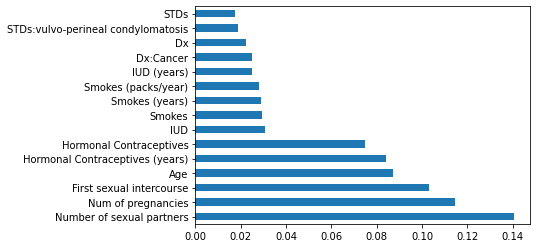

In [112]:

feature_nodel = ExtraTreesClassifier()
feature_nodel.fit(X_resampled_df_1,Y_resampled_df['have_cancer'])
print(feature_nodel.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(feature_nodel.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

## Creating NN Model

In [113]:
nn_model_15_features = Sequential()
nn_model_15_features.add(Dense(60, input_dim=15, activation='relu'))
nn_model_15_features.add(Dense(20, activation='relu'))
nn_model_15_features.add(Dropout(0.5))
nn_model_15_features.add(Dense(1, activation='sigmoid'))
# Compile model
nn_model_15_features.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model_15_features.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 60)                960       
_________________________________________________________________
dense_39 (Dense)             (None, 20)                1220      
_________________________________________________________________
dropout_10 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 21        
Total params: 2,201
Trainable params: 2,201
Non-trainable params: 0
_________________________________________________________________


In [114]:
####
# Getting the top 15 Feature in dataframe
####

X_15_features=X_resampled_df_1[feat_importances.nlargest(15).index]

In [115]:
####
# Viewing the top 15 Feature dataframe
####
X_15_features

,Number of sexual partners,Num of pregnancies,First sexual intercourse,Age,Hormonal Contraceptives (years),Hormonal Contraceptives,IUD,Smokes,Smokes (years),Smokes (packs/year),IUD (years),Dx:Cancer,Dx,STDs:vulvo-perineal condylomatosis,STDs
0,0,1,0,0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0,1,0,8,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
2,9,8,3,9,3.000000,1.000000,0.0,1.0,37.000000,37.000000,0.0,1.0,0.0,0.000000,0.0
3,6,4,9,9,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
4,6,8,9,9,2.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,6,8,4,7,1.151133,1.000000,0.0,1.0,13.622167,1.396222,0.0,0.0,0.0,0.075567,1.0
1087,5,0,4,5,2.486523,0.828841,0.0,1.0,8.657682,1.238747,0.0,0.0,0.0,1.000000,1.0
1088,5,6,6,7,9.161849,1.000000,0.0,1.0,9.209538,1.130491,0.0,0.0,0.0,0.000000,0.0
1089,0,7,0,6,0.000000,0.000000,0.0,1.0,21.854750,3.274823,0.0,0.0,0.0,0.009683,1.0


In [116]:

####
# Training and testing the NN model 
####

X_train, X_test, Y_train, Y_test = train_test_split(X_15_features, Y_resampled_df, test_size=0.3, random_state=0)
nn_model_15_features.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss, test_acc_15 = nn_model_15_features.evaluate(X_test, Y_test) 
y_pred1 = nn_model_15_features.predict(X_test)
y_pred = np.round(y_pred1)


precision_15_features= precision_score(Y_test, y_pred , average="binary",labels=np.unique(y_pred))
recall_15_features = recall_score(Y_test, y_pred , average="binary")
F1_score_15_features = f1_score(Y_test, y_pred , average="binary")
cm_15_features = confusion_matrix(Y_test, y_pred)



accuracy_list_discretization.append(test_acc_15)
precesion_list_discretization.append(precision_15_features)
f1_score_list_discretization.append(F1_score_15_features)
recall_list_discretization.append(recall_15_features)
cm_list_discretization.append(cm_15_features)

Epoch 1/50
763/763 [==============================] - 1s 1ms/step - loss: 0.7332 - accuracy: 0.6306
Epoch 2/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5506 - accuracy: 0.7324
Epoch 3/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5347 - accuracy: 0.7146
Epoch 4/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4968 - accuracy: 0.7754
Epoch 5/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5068 - accuracy: 0.7550
Epoch 6/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4518 - accuracy: 0.8079
Epoch 7/50
763/763 [==============================] - 1s 1ms/step - loss: 0.3959 - accuracy: 0.8219
Epoch 8/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4756 - accuracy: 0.8102
Epoch 9/50
763/763 [==============================] - 1s 1ms/step - loss: 0.3658 - accuracy: 0.8179
Epoch 10/50
763/763 [==============================] - 1s 1ms/step - loss: 0.3754 - accuracy: 0.8399

## Creating the CNN Model

In [117]:
model_cnn_15 = Sequential([
  Conv1D(8, 3, input_shape=(15,1,), padding='same'),
  MaxPooling1D(pool_size=2,padding='same'),
  Flatten(),
  Dense(1, activation='sigmoid')
])
model_cnn_15.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn_15.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 15, 8)             32        
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 8, 8)              0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 65        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [118]:
x_train_list = []
for index , item in X_15_features.iterrows() : 
  item = np.expand_dims(item , axis =1)
  x_train_list.append(item)
X_numpy= np.array(x_train_list)
X_train, X_test, Y_train, Y_test = train_test_split(X_numpy, Y, test_size=0.3, random_state=0)
model_cnn_15.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss_cnn_15, test_acc_cnn_15 = model_cnn_15.evaluate(X_test, Y_test) 
y_pred1 = model_cnn_15.predict(X_test)
y_pred = np.round(y_pred1)


precision_cnn_15= precision_score(Y_test, y_pred , average="macro")
recall_cnn_15= recall_score(Y_test, y_pred , average="macro")
F1_score_cnn_15 = f1_score(Y_test, y_pred , average="macro")
cm_cnn_15= confusion_matrix(Y_test, y_pred)


accuracy_list_discretization_cnn.append(test_acc_cnn_15)
precesion_list_discretization_cnn.append(precision_cnn_15)
f1_score_list_discretization_cnn.append(F1_score_cnn_15)
recall_list_discretization_cnn.append(recall_cnn_15)
cm_list_discretization_cnn.append(cm_cnn_15)

Epoch 1/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6998 - accuracy: 0.5906
Epoch 2/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5909 - accuracy: 0.7130
Epoch 3/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5384 - accuracy: 0.7306
Epoch 4/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5014 - accuracy: 0.8003
Epoch 5/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5217 - accuracy: 0.7637
Epoch 6/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4827 - accuracy: 0.7739
Epoch 7/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4905 - accuracy: 0.7966
Epoch 8/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5052 - accuracy: 0.7866
Epoch 9/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4920 - accuracy: 0.7847
Epoch 10/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4750 - accuracy: 0.7942

## Using Top 20 Features 

[0.08669199 0.15555344 0.09765895 0.10889908 0.02947721 0.03020911
 0.0260335  0.07481801 0.07961919 0.03682338 0.02483573 0.01508095
 0.01225211 0.01402222 0.00846534 0.0080077  0.01586087 0.01099992
 0.00584916 0.00672003 0.00841682 0.01095888 0.01088377 0.01401534
 0.01275597 0.00748119 0.00921428 0.00688631 0.01902038 0.00897454
 0.02246893 0.0210457 ]


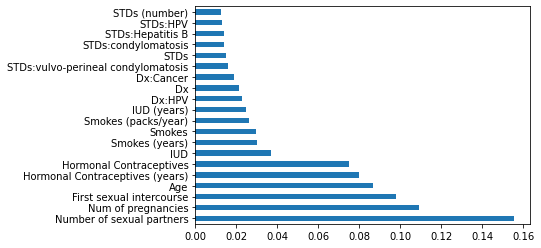

In [119]:

feature_nodel = ExtraTreesClassifier()
feature_nodel.fit(X_resampled_df_1,Y_resampled_df['have_cancer'])
print(feature_nodel.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(feature_nodel.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Creating Neural Network

In [120]:
nn_model_20_features = Sequential()
nn_model_20_features.add(Dense(60, input_dim=20, activation='relu'))
nn_model_20_features.add(Dense(20, activation='relu'))
nn_model_20_features.add(Dropout(0.5))
nn_model_20_features.add(Dense(1, activation='sigmoid'))
# Compile model
nn_model_20_features.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model_20_features.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 60)                1260      
_________________________________________________________________
dense_43 (Dense)             (None, 20)                1220      
_________________________________________________________________
dropout_11 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 21        
Total params: 2,501
Trainable params: 2,501
Non-trainable params: 0
_________________________________________________________________


In [121]:
###
#Creating top 20 Features Dataframe
####

X_20_features=X_resampled_df_1[feat_importances.nlargest(20).index]

In [122]:
###
#Viewing top 20 Features Dataframe
####

X_20_features

,Number of sexual partners,Num of pregnancies,First sexual intercourse,Age,Hormonal Contraceptives (years),Hormonal Contraceptives,IUD,Smokes (years),Smokes,Smokes (packs/year),IUD (years),Dx:HPV,Dx,Dx:Cancer,STDs:vulvo-perineal condylomatosis,STDs,STDs:condylomatosis,STDs:Hepatitis B,STDs:HPV,STDs (number)
0,0,1,0,0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
1,0,1,0,8,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
2,9,8,3,9,3.000000,1.000000,0.0,37.000000,1.0,37.000000,0.0,1.0,0.0,1.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
3,6,4,9,9,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
4,6,8,9,9,2.000000,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,6,8,4,7,1.151133,1.000000,0.0,13.622167,1.0,1.396222,0.0,0.0,0.0,0.0,0.075567,1.0,0.075567,0.0,0.0,1.075567
1087,5,0,4,5,2.486523,0.828841,0.0,8.657682,1.0,1.238747,0.0,0.0,0.0,0.0,1.000000,1.0,1.000000,0.0,0.0,2.000000
1088,5,6,6,7,9.161849,1.000000,0.0,9.209538,1.0,1.130491,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
1089,0,7,0,6,0.000000,0.000000,0.0,21.854750,1.0,3.274823,0.0,0.0,0.0,0.0,0.009683,1.0,0.009683,0.0,0.0,1.009683


In [123]:
X_train, X_test, Y_train, Y_test = train_test_split(X_20_features, Y_resampled_df, test_size=0.3, random_state=0)
nn_model_20_features.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss, test_acc_20 = nn_model_20_features.evaluate(X_test, Y_test) 
y_pred1 = nn_model_20_features.predict(X_test)
y_pred = np.round(y_pred1)

precision_20_features= precision_score(Y_test, y_pred , average="binary",labels=np.unique(y_pred))
recall_20_features = recall_score(Y_test, y_pred , average="binary")
F1_score_20_features = f1_score(Y_test, y_pred , average="binary")
cm_20_features = confusion_matrix(Y_test, y_pred)






accuracy_list_discretization.append(test_acc_20)
precesion_list_discretization.append(precision_20_features)
f1_score_list_discretization.append(F1_score_20_features)
recall_list_discretization.append(recall_20_features)
cm_list_discretization.append(cm_20_features)

Epoch 1/50
763/763 [==============================] - 1s 1ms/step - loss: 0.7939 - accuracy: 0.6041
Epoch 2/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5612 - accuracy: 0.7017
Epoch 3/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5137 - accuracy: 0.7697
Epoch 4/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5137 - accuracy: 0.7640
Epoch 5/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4935 - accuracy: 0.7389
Epoch 6/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4143 - accuracy: 0.8103
Epoch 7/50
763/763 [==============================] - 1s 1ms/step - loss: 0.3774 - accuracy: 0.8307
Epoch 8/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4079 - accuracy: 0.8040
Epoch 9/50
763/763 [==============================] - 1s 1ms/step - loss: 0.3297 - accuracy: 0.8276
Epoch 10/50
763/763 [==============================] - 1s 1ms/step - loss: 0.3858 - accuracy: 0.8312

## Creating CNN Model

In [124]:
model_cnn_20 = Sequential([
  Conv1D(8, 3, input_shape=(20,1,), padding='same'),
  MaxPooling1D(pool_size=2,padding='same'),
  Flatten(),
  Dense(1, activation='sigmoid')
])
model_cnn_20.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn_20.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 20, 8)             32        
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 10, 8)             0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 80)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 81        
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [125]:
x_train_list = []
for index , item in X_20_features.iterrows() : 
  item = np.expand_dims(item , axis =1)
  x_train_list.append(item)
X_numpy= np.array(x_train_list)
X_train, X_test, Y_train, Y_test = train_test_split(X_numpy, Y, test_size=0.3, random_state=0)
model_cnn_20.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss_cnn_20, test_acc_cnn_20 = model_cnn_20.evaluate(X_test, Y_test) 
y_pred1 = model_cnn_20.predict(X_test)
y_pred = np.round(y_pred1)


precision_cnn_20= precision_score(Y_test, y_pred , average="macro")
recall_cnn_20= recall_score(Y_test, y_pred , average="macro")
F1_score_cnn_20 = f1_score(Y_test, y_pred , average="macro")
cm_cnn_20= confusion_matrix(Y_test, y_pred)


accuracy_list_discretization_cnn.append(test_acc_cnn_20)
precesion_list_discretization_cnn.append(precision_cnn_20)
f1_score_list_discretization_cnn.append(F1_score_cnn_20)
recall_list_discretization_cnn.append(recall_cnn_20)
cm_list_discretization_cnn.append(cm_cnn_20)

Epoch 1/50
763/763 [==============================] - 1s 1ms/step - loss: 0.7081 - accuracy: 0.6104
Epoch 2/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5353 - accuracy: 0.7533
Epoch 3/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5086 - accuracy: 0.7613
Epoch 4/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4959 - accuracy: 0.7752
Epoch 5/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4573 - accuracy: 0.7976
Epoch 6/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4827 - accuracy: 0.7889
Epoch 7/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4790 - accuracy: 0.7809
Epoch 8/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4650 - accuracy: 0.7757
Epoch 9/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4921 - accuracy: 0.7831
Epoch 10/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4623 - accuracy: 0.7810

## Using Top 25 Features

[0.08795311 0.14528787 0.09744752 0.11570623 0.02926264 0.03027009
 0.0291083  0.07758715 0.08683895 0.03118705 0.02649092 0.01576077
 0.01073381 0.01721679 0.00997716 0.00761646 0.01338723 0.00896669
 0.01525739 0.00660202 0.00440978 0.00764238 0.00921538 0.01143513
 0.0120453  0.0070922  0.00902875 0.0080182  0.02195722 0.00825449
 0.01931208 0.01893094]


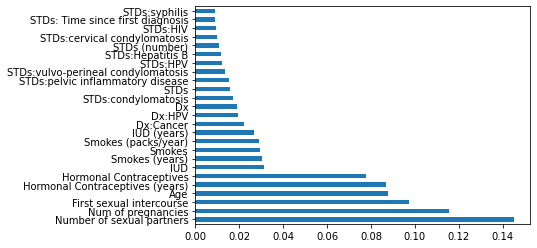

In [126]:

feature_nodel = ExtraTreesClassifier()
feature_nodel.fit(X_resampled_df_1,Y_resampled_df['have_cancer'])
print(feature_nodel.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(feature_nodel.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

## Creating Neural Network

In [127]:
nn_model_25_features = Sequential()
nn_model_25_features.add(Dense(60, input_dim=25, activation='relu'))
nn_model_25_features.add(Dense(20, activation='relu'))
nn_model_25_features.add(Dropout(0.5))
nn_model_25_features.add(Dense(1, activation='sigmoid'))
# Compile model
nn_model_25_features.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model_25_features.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 60)                1560      
_________________________________________________________________
dense_47 (Dense)             (None, 20)                1220      
_________________________________________________________________
dropout_12 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 21        
Total params: 2,801
Trainable params: 2,801
Non-trainable params: 0
_________________________________________________________________


In [128]:
###
#Creating top 25 features dataframe
###
X_25_features=X_resampled_df_1[feat_importances.nlargest(25).index]

In [129]:
###
#Viewing top 25 features dataframe
###
X_25_features

,Number of sexual partners,Num of pregnancies,First sexual intercourse,Age,Hormonal Contraceptives (years),Hormonal Contraceptives,IUD,Smokes (years),Smokes,Smokes (packs/year),IUD (years),Dx:Cancer,Dx:HPV,Dx,STDs:condylomatosis,STDs,STDs:pelvic inflammatory disease,STDs:vulvo-perineal condylomatosis,STDs:HPV,STDs:Hepatitis B,STDs (number),STDs:cervical condylomatosis,STDs:HIV,STDs: Time since first diagnosis,STDs:syphilis
0,0,1,0,0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,-1.000000,0.0
1,0,1,0,8,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,-1.000000,0.0
2,9,8,3,9,3.000000,1.000000,0.0,37.000000,1.0,37.000000,0.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,-1.000000,0.0
3,6,4,9,9,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,-1.000000,0.0
4,6,8,9,9,2.000000,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,-1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,6,8,4,7,1.151133,1.000000,0.0,13.622167,1.0,1.396222,0.0,0.0,0.0,0.0,0.075567,1.0,0.0,0.075567,0.0,0.0,1.075567,0.0,0.924433,15.319901,0.0
1087,5,0,4,5,2.486523,0.828841,0.0,8.657682,1.0,1.238747,0.0,0.0,0.0,0.0,1.000000,1.0,0.0,1.000000,0.0,0.0,2.000000,0.0,0.000000,6.657682,0.0
1088,5,6,6,7,9.161849,1.000000,0.0,9.209538,1.0,1.130491,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,-1.000000,0.0
1089,0,7,0,6,0.000000,0.000000,0.0,21.854750,1.0,3.274823,0.0,0.0,0.0,0.0,0.009683,1.0,0.0,0.009683,0.0,0.0,1.009683,0.0,0.990317,3.019367,0.0


In [130]:
X_train, X_test, Y_train, Y_test = train_test_split(X_25_features, Y_resampled_df, test_size=0.3, random_state=0)
nn_model_25_features.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss, test_acc_25 = nn_model_25_features.evaluate(X_test, Y_test) 
y_pred1 = nn_model_25_features.predict(X_test)
y_pred = np.round(y_pred1)

precision_25_features= precision_score(Y_test, y_pred , average="binary",labels=np.unique(y_pred))
recall_25_features = recall_score(Y_test, y_pred , average="binary")
F1_score_25_features = f1_score(Y_test, y_pred , average="binary")
cm_25_features = confusion_matrix(Y_test, y_pred)




accuracy_list_discretization.append(test_acc_25)
precesion_list_discretization.append(precision_25_features)
f1_score_list_discretization.append(F1_score_25_features)
recall_list_discretization.append(recall_25_features)
cm_list_discretization.append(cm_25_features)

Epoch 1/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6913 - accuracy: 0.5635
Epoch 2/50
763/763 [==============================] - 1s 2ms/step - loss: 0.5731 - accuracy: 0.7367
Epoch 3/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5216 - accuracy: 0.7502
Epoch 4/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5053 - accuracy: 0.7651
Epoch 5/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4674 - accuracy: 0.7792
Epoch 6/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4354 - accuracy: 0.8128
Epoch 7/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4120 - accuracy: 0.8043
Epoch 8/50
763/763 [==============================] - 1s 1ms/step - loss: 0.3992 - accuracy: 0.8071
Epoch 9/50
763/763 [==============================] - 1s 1ms/step - loss: 0.3886 - accuracy: 0.8272
Epoch 10/50
763/763 [==============================] - 1s 1ms/step - loss: 0.3820 - accuracy: 0.8390

## Creating CNN Model

In [131]:
model_cnn_25 = Sequential([
  Conv1D(8, 3, input_shape=(25,1,), padding='same'),
  MaxPooling1D(pool_size=2,padding='same'),
  Flatten(),
  Dense(1, activation='sigmoid')
])
model_cnn_25.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn_25.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 25, 8)             32        
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 13, 8)             0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 104)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 105       
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


In [132]:
x_train_list = []
for index , item in X_25_features.iterrows() : 
  item = np.expand_dims(item , axis =1)
  x_train_list.append(item)
X_numpy= np.array(x_train_list)
X_train, X_test, Y_train, Y_test = train_test_split(X_numpy, Y, test_size=0.3, random_state=0)
model_cnn_25.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss_cnn_25, test_acc_cnn_25 = model_cnn_25.evaluate(X_test, Y_test) 
y_pred1 = model_cnn_25.predict(X_test)
y_pred = np.round(y_pred1)


precision_cnn_25= precision_score(Y_test, y_pred , average="macro")
recall_cnn_25= recall_score(Y_test, y_pred , average="macro")
F1_score_cnn_25 = f1_score(Y_test, y_pred , average="macro")
cm_cnn_25= confusion_matrix(Y_test, y_pred)


accuracy_list_discretization_cnn.append(test_acc_cnn_25)
precesion_list_discretization_cnn.append(precision_cnn_25)
f1_score_list_discretization_cnn.append(F1_score_cnn_25)
recall_list_discretization_cnn.append(recall_cnn_25)
cm_list_discretization_cnn.append(cm_cnn_25)

Epoch 1/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6331 - accuracy: 0.6301
Epoch 2/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5469 - accuracy: 0.7467
Epoch 3/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5536 - accuracy: 0.7354
Epoch 4/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5304 - accuracy: 0.7369
Epoch 5/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5149 - accuracy: 0.7510
Epoch 6/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5143 - accuracy: 0.7375
Epoch 7/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4695 - accuracy: 0.7766
Epoch 8/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4855 - accuracy: 0.7607
Epoch 9/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4833 - accuracy: 0.7872
Epoch 10/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4718 - accuracy: 0.7723

## Using all Features

[0.08611077 0.14941168 0.10451233 0.10902005 0.03021612 0.02913252
 0.02655363 0.07214778 0.08036619 0.03162994 0.02291244 0.01498389
 0.01321856 0.01352823 0.00958429 0.01038265 0.01815821 0.01487946
 0.0102442  0.01037392 0.00878249 0.00630149 0.01156159 0.01259138
 0.00756572 0.00895158 0.00723048 0.00964481 0.02119405 0.00769961
 0.02231787 0.01879207]


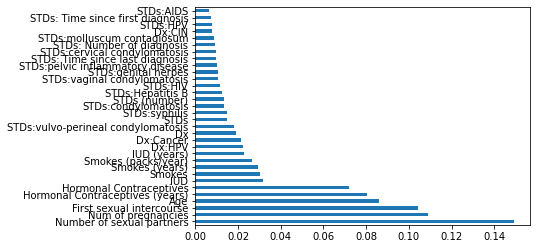

In [133]:

feature_nodel = ExtraTreesClassifier()
feature_nodel.fit(X_resampled_df_1,Y_resampled_df['have_cancer'])
print(feature_nodel.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(feature_nodel.feature_importances_, index=X.columns)
feat_importances.nlargest(32).plot(kind='barh')
plt.show()

## Creating Neural Network

In [134]:
nn_model_all_features = Sequential()
nn_model_all_features.add(Dense(60, input_dim=32, activation='relu'))
nn_model_all_features.add(Dense(20, activation='relu'))
nn_model_all_features.add(Dropout(0.5))
nn_model_all_features.add(Dense(1, activation='sigmoid'))
# Compile model
nn_model_all_features.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model_all_features.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 60)                1980      
_________________________________________________________________
dense_51 (Dense)             (None, 20)                1220      
_________________________________________________________________
dropout_13 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 21        
Total params: 3,221
Trainable params: 3,221
Non-trainable params: 0
_________________________________________________________________


In [135]:
###
# Viewing all features dataframe
###
X_resampled_df_1

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
0,0,0,0,1,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-1.000000,-1.000000,0.0,0.0,0.0,0.0
1,8,0,0,1,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-1.000000,-1.000000,0.0,0.0,0.0,0.0
2,9,9,3,8,1.0,37.000000,37.000000,1.000000,3.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-1.000000,-1.000000,1.0,0.0,1.0,0.0
3,9,6,9,4,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-1.000000,-1.000000,0.0,0.0,0.0,0.0
4,9,6,9,8,0.0,0.000000,0.000000,1.000000,2.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-1.000000,-1.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,7,6,4,8,1.0,13.622167,1.396222,1.000000,1.151133,0.0,0.0,1.0,1.075567,0.075567,0.0,0.0,0.075567,0.0,0.0,0.0,0.0,0.0,0.924433,0.0,0.0,1.0,15.319901,15.319901,0.0,0.0,0.0,0.0
1087,5,5,4,0,1.0,8.657682,1.238747,0.828841,2.486523,0.0,0.0,1.0,2.000000,1.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,6.657682,6.657682,0.0,0.0,0.0,0.0
1088,7,5,6,6,1.0,9.209538,1.130491,1.000000,9.161849,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-1.000000,-1.000000,0.0,0.0,0.0,0.0
1089,6,0,0,7,1.0,21.854750,3.274823,0.000000,0.000000,0.0,0.0,1.0,1.009683,0.009683,0.0,0.0,0.009683,0.0,0.0,0.0,0.0,0.0,0.990317,0.0,0.0,1.0,3.019367,3.019367,0.0,0.0,0.0,0.0


In [136]:
####
#Training and testing the model
####

X_train, X_test, Y_train, Y_test = train_test_split(X_resampled_df_1, Y_resampled_df, test_size=0.3, random_state=0,shuffle = True)
nn_model_all_features.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss, test_acc_all = nn_model_all_features.evaluate(X_test, Y_test) 
y_pred1 = nn_model_all_features.predict(X_test)
y_pred = np.round(y_pred1)


precision_all_features= precision_score(Y_test, y_pred , average="binary",labels=np.unique(y_pred))
recall_all_features = recall_score(Y_test, y_pred , average="binary")
F1_score_all_features = f1_score(Y_test, y_pred , average="binary")
cm_all_features = confusion_matrix(Y_test, y_pred)



accuracy_list_discretization.append(test_acc_all)
precesion_list_discretization.append(precision_all_features)
f1_score_list_discretization.append(F1_score_all_features)
recall_list_discretization.append(recall_all_features)
cm_list_discretization.append(cm_all_features)

Epoch 1/50
763/763 [==============================] - 1s 1ms/step - loss: 0.8523 - accuracy: 0.6026
Epoch 2/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5738 - accuracy: 0.7174
Epoch 3/50
763/763 [==============================] - 1s 2ms/step - loss: 0.4966 - accuracy: 0.7805
Epoch 4/50
763/763 [==============================] - 1s 2ms/step - loss: 0.4355 - accuracy: 0.7842
Epoch 5/50
763/763 [==============================] - 1s 2ms/step - loss: 0.4124 - accuracy: 0.8144
Epoch 6/50
763/763 [==============================] - 1s 2ms/step - loss: 0.4056 - accuracy: 0.8023
Epoch 7/50
763/763 [==============================] - 1s 2ms/step - loss: 0.3741 - accuracy: 0.8181
Epoch 8/50
763/763 [==============================] - 1s 1ms/step - loss: 0.3482 - accuracy: 0.8254
Epoch 9/50
763/763 [==============================] - 1s 1ms/step - loss: 0.3631 - accuracy: 0.8201
Epoch 10/50
763/763 [==============================] - 1s 1ms/step - loss: 0.3300 - accuracy: 0.8627

In [137]:
x_train_list = []
for index , item in X_resampled_df_1.iterrows() : 
  item = np.expand_dims(item , axis =1)
  x_train_list.append(item)
X_numpy= np.array(x_train_list)
X_train, X_test, Y_train, Y_test = train_test_split(X_numpy, Y, test_size=0.3, random_state=0)
model.fit(X_train, Y_train, epochs=50, batch_size=1)
test_loss_cnn_all, test_acc_cnn_all = model.evaluate(X_test, Y_test) 
y_pred1 = model.predict(X_test)
y_pred = np.round(y_pred1)


precision_cnn_all= precision_score(Y_test, y_pred , average="macro")
recall_cnn_all = recall_score(Y_test, y_pred , average="macro")
F1_score_cnn_all = f1_score(Y_test, y_pred , average="macro")
cm_cnn_all = confusion_matrix(Y_test, y_pred)


accuracy_list_discretization_cnn.append(test_acc_cnn_all)
precesion_list_discretization_cnn.append(precision_cnn_all)
f1_score_list_discretization_cnn.append(F1_score_cnn_all)
recall_list_discretization_cnn.append(recall_cnn_all)
cm_list_discretization_cnn.append(cm_cnn_all)

Epoch 1/50
763/763 [==============================] - 1s 1ms/step - loss: 0.6721 - accuracy: 0.6815
Epoch 2/50
763/763 [==============================] - 1s 1ms/step - loss: 0.5268 - accuracy: 0.7025
Epoch 3/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4941 - accuracy: 0.7274
Epoch 4/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4820 - accuracy: 0.7339
Epoch 5/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4641 - accuracy: 0.7444
Epoch 6/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4634 - accuracy: 0.7444
Epoch 7/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4557 - accuracy: 0.7615
Epoch 8/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4536 - accuracy: 0.7680
Epoch 9/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4511 - accuracy: 0.7602
Epoch 10/50
763/763 [==============================] - 1s 1ms/step - loss: 0.4507 - accuracy: 0.7602

## Evaluating Results

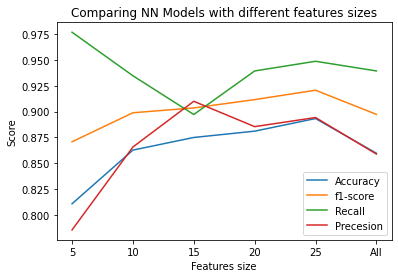

In [138]:
###
#Plotting accuracy of model using different sizes 
###
xAxis = [5,10,15,20,25,'All']
plt.plot(xAxis,accuracy_list_discretization, label = "Accuracy")
plt.plot(xAxis,f1_score_list_discretization, label = "f1-score")
plt.plot(xAxis,recall_list_discretization, label = "Recall")
plt.plot(xAxis,precesion_list_discretization, label = "Precesion")

plt.title('Comparing NN Models with different features sizes')
plt.xlabel('Features size')
plt.ylabel('Score')
plt.legend()
plt.show()




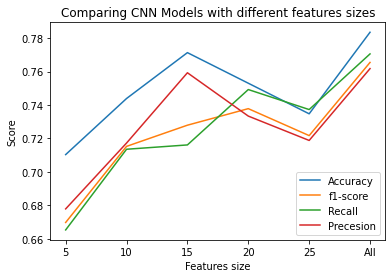

In [139]:
###
#Plotting accuracy of model using different sizes 
###
xAxis = [5,10,15,20,25,'All']
plt.plot(xAxis,accuracy_list_discretization_cnn, label = "Accuracy")
plt.plot(xAxis,f1_score_list_discretization_cnn, label = "f1-score")
plt.plot(xAxis,recall_list_discretization_cnn, label = "Recall")
plt.plot(xAxis,precesion_list_discretization_cnn, label = "Precesion")

plt.title('Comparing CNN Models with different features sizes')
plt.xlabel('Features size')
plt.ylabel('Score')
plt.legend()
plt.show()




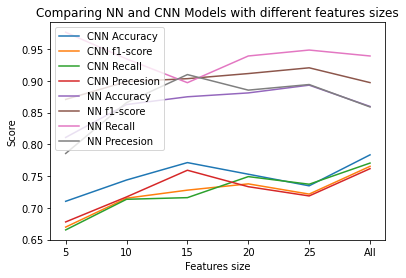

<Figure size 144x72 with 0 Axes>

In [140]:
###
#Plotting accuracy of model using different sizes 
###
xAxis = [5,10,15,20,25,'All']
plt.plot(xAxis,accuracy_list_discretization_cnn, label = "CNN Accuracy")
plt.plot(xAxis,f1_score_list_discretization_cnn, label = "CNN f1-score")
plt.plot(xAxis,recall_list_discretization_cnn, label = "CNN Recall")
plt.plot(xAxis,precesion_list_discretization_cnn, label = "CNN Precesion")

plt.plot(xAxis,accuracy_list_discretization, label = "NN Accuracy")
plt.plot(xAxis,f1_score_list_discretization, label = "NN f1-score")
plt.plot(xAxis,recall_list_discretization, label = "NN Recall")
plt.plot(xAxis,precesion_list_discretization, label = "NN Precesion")


plt.title('Comparing NN and CNN Models with different features sizes')
plt.xlabel('Features size')
plt.ylabel('Score')
plt.legend();
plt.figure(figsize=(2,1)) ; 
plt.show();




## Confusion Matrix

In [141]:
feature_sizes = [5,10,15,20,25,'All']
print( 'NN Models ' )
for feature_size , confusion_matrix in zip(feature_sizes ,cm_list_discretization):
  print( 'size' , feature_size )
  print( 'confusion matrix ' )
  print(confusion_matrix)
  print('-----')
print('------------------')
print('------------------')
print('------------------')
print( 'CNN Models ' )
for feature_size , confusion_matrix in zip(feature_sizes ,cm_list_discretization_cnn):
  print( 'size' , feature_size )
  print( 'confusion matrix ' )
  print(confusion_matrix)
  print('-----')

NN Models 
size 5
confusion matrix 
[[ 57  57]
 [  5 209]]
-----
size 10
confusion matrix 
[[ 83  31]
 [ 14 200]]
-----
size 15
confusion matrix 
[[ 95  19]
 [ 22 192]]
-----
size 20
confusion matrix 
[[ 88  26]
 [ 13 201]]
-----
size 25
confusion matrix 
[[ 90  24]
 [ 11 203]]
-----
size All
confusion matrix 
[[ 81  33]
 [ 13 201]]
-----
------------------
------------------
------------------
CNN Models 
size 5
confusion matrix 
[[ 59  55]
 [ 40 174]]
-----
size 10
confusion matrix 
[[ 70  44]
 [ 40 174]]
-----
size 15
confusion matrix 
[[ 61  53]
 [ 22 192]]
-----
size 20
confusion matrix 
[[ 84  30]
 [ 51 163]]
-----
size 25
confusion matrix 
[[ 85  29]
 [ 58 156]]
-----
size All
confusion matrix 
[[ 83  31]
 [ 40 174]]
-----


# COMPARING WITH AND WITHOUT FEATURE BINNING

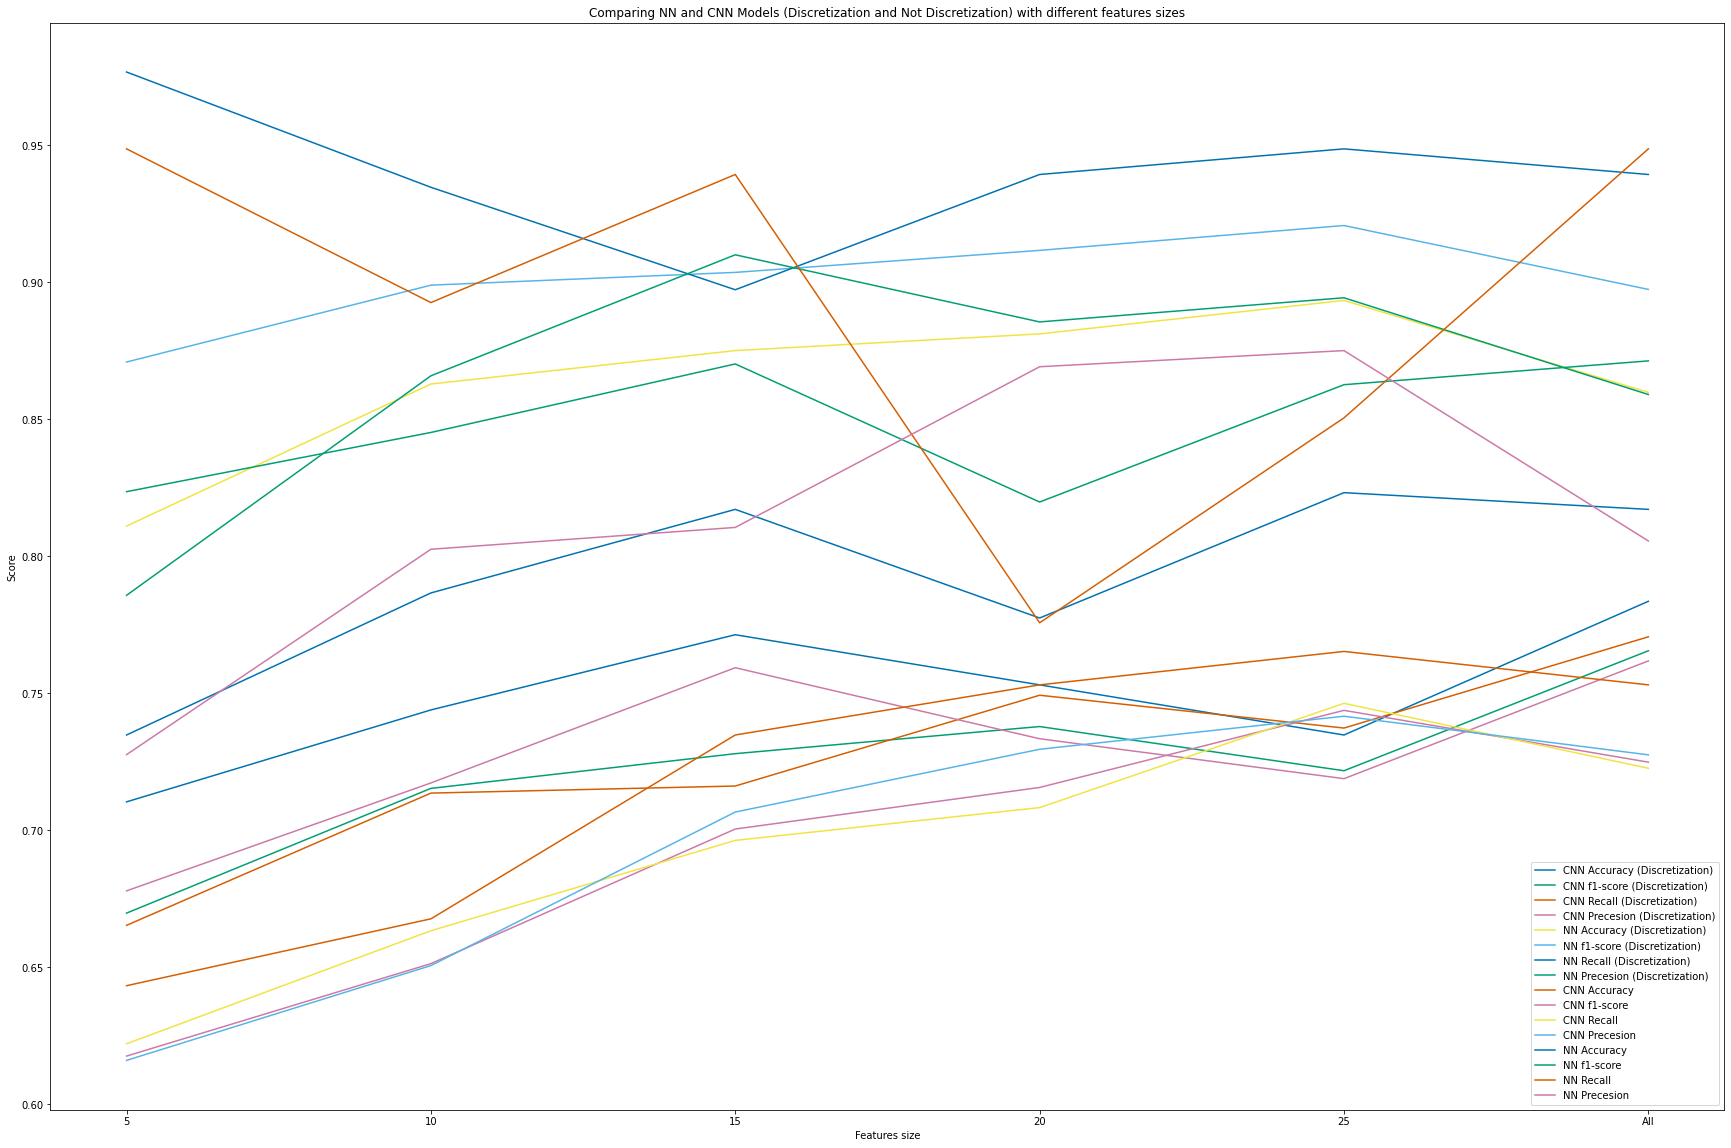

In [165]:

###
#Plotting accuracy of model using different sizes 
###
xAxis = [5,10,15,20,25,'All']
plt.plot(xAxis,accuracy_list_discretization_cnn,label = "CNN Accuracy (Discretization)" )
plt.plot(xAxis,f1_score_list_discretization_cnn, label = "CNN f1-score (Discretization)")
plt.plot(xAxis,recall_list_discretization_cnn, label = "CNN Recall (Discretization)")
plt.plot(xAxis,precesion_list_discretization_cnn, label = "CNN Precesion (Discretization)")

plt.plot(xAxis,accuracy_list_discretization, label = "NN Accuracy (Discretization)")
plt.plot(xAxis,f1_score_list_discretization, label = "NN f1-score (Discretization)")
plt.plot(xAxis,recall_list_discretization, label = "NN Recall (Discretization)")
plt.plot(xAxis,precesion_list_discretization, label = "NN Precesion (Discretization)")


plt.plot(xAxis,accuracy_list_cnn, label = "CNN Accuracy")
plt.plot(xAxis,f1_score_list_cnn, label = "CNN f1-score")
plt.plot(xAxis,recall_list_cnn, label = "CNN Recall")
plt.plot(xAxis,precesion_list_cnn, label = "CNN Precesion")

plt.plot(xAxis,accuracy_list, label = "NN Accuracy")
plt.plot(xAxis,f1_score_list, label = "NN f1-score")
plt.plot(xAxis,recall_list, label = "NN Recall")
plt.plot(xAxis,precesion_list, label = "NN Precesion")

plt.title('Comparing NN and CNN Models (Discretization and Not Discretization) with different features sizes')
plt.xlabel('Features size')
plt.ylabel('Score')
plt.legend();

plt.rcParams["figure.figsize"] = (30,20)

plt.show();




# Convolutional  Neural Network Evalution

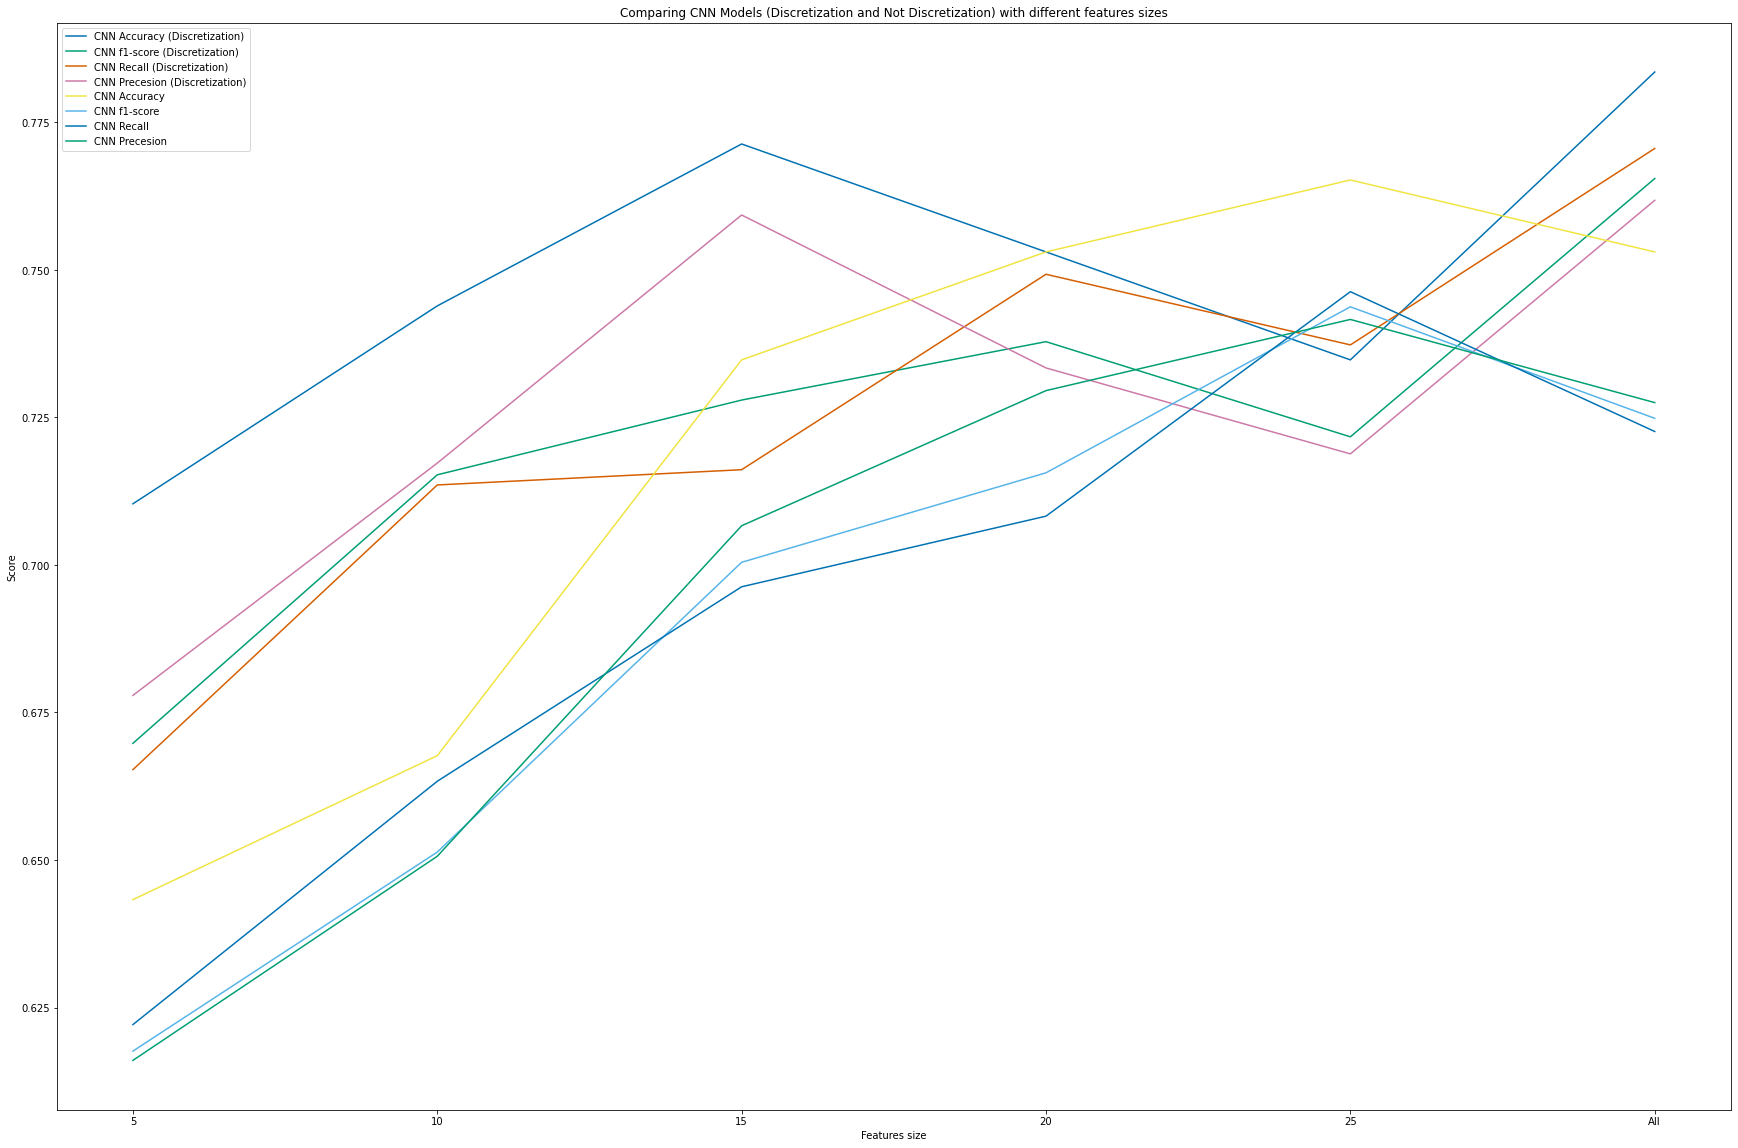

In [168]:

###
#Plotting accuracy of model using different sizes 
###
xAxis = [5,10,15,20,25,'All']
plt.plot(xAxis,accuracy_list_discretization_cnn,label = "CNN Accuracy (Discretization)" )
plt.plot(xAxis,f1_score_list_discretization_cnn, label = "CNN f1-score (Discretization)")
plt.plot(xAxis,recall_list_discretization_cnn, label = "CNN Recall (Discretization)")
plt.plot(xAxis,precesion_list_discretization_cnn, label = "CNN Precesion (Discretization)")



plt.plot(xAxis,accuracy_list_cnn, label = "CNN Accuracy")
plt.plot(xAxis,f1_score_list_cnn, label = "CNN f1-score")
plt.plot(xAxis,recall_list_cnn, label = "CNN Recall")
plt.plot(xAxis,precesion_list_cnn, label = "CNN Precesion")



plt.title('Comparing CNN Models (Discretization and Not Discretization) with different features sizes')
plt.xlabel('Features size')
plt.ylabel('Score')
plt.legend();

plt.rcParams["figure.figsize"] = (10,20)

plt.show();




# Neural Network Evalution

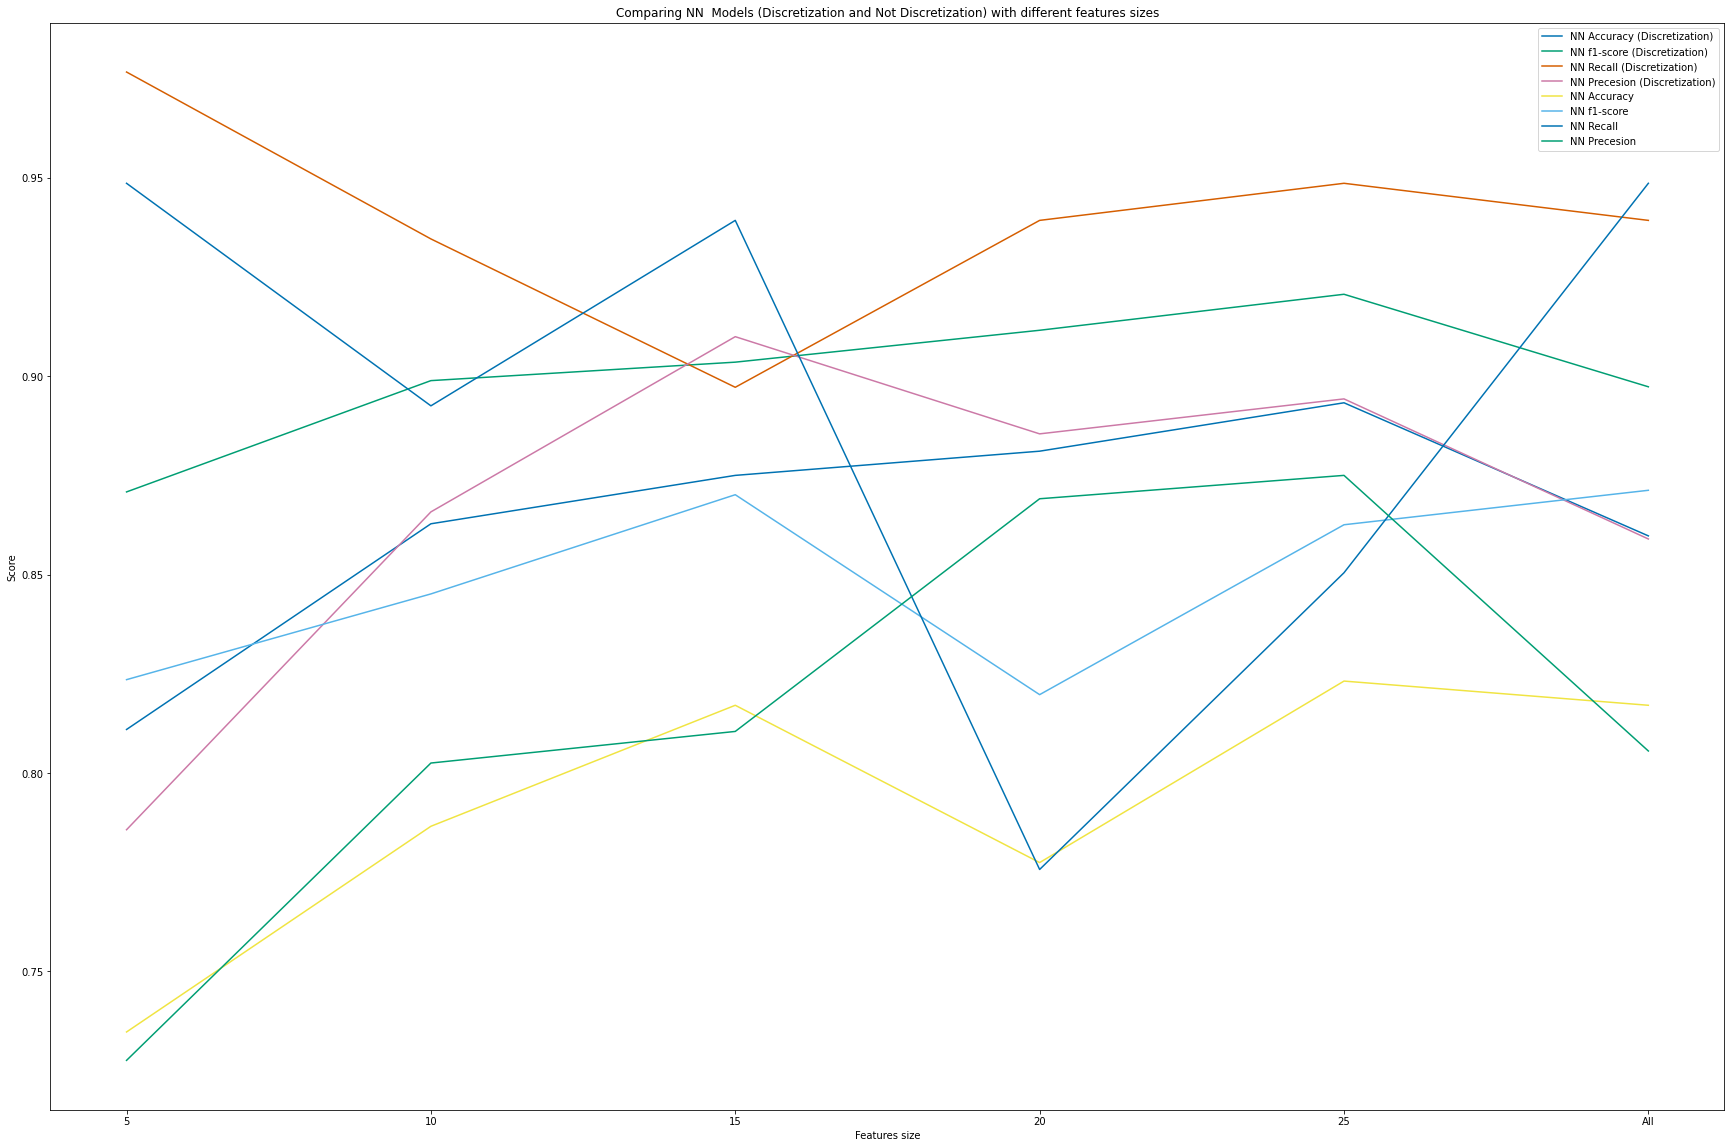

In [166]:

###
#Plotting accuracy of model using different sizes 
###
xAxis = [5,10,15,20,25,'All']


plt.plot(xAxis,accuracy_list_discretization, label = "NN Accuracy (Discretization)")
plt.plot(xAxis,f1_score_list_discretization, label = "NN f1-score (Discretization)")
plt.plot(xAxis,recall_list_discretization, label = "NN Recall (Discretization)")
plt.plot(xAxis,precesion_list_discretization, label = "NN Precesion (Discretization)")


plt.plot(xAxis,accuracy_list, label = "NN Accuracy")
plt.plot(xAxis,f1_score_list, label = "NN f1-score")
plt.plot(xAxis,recall_list, label = "NN Recall")
plt.plot(xAxis,precesion_list, label = "NN Precesion")

plt.title('Comparing NN  Models (Discretization and Not Discretization) with different features sizes')
plt.xlabel('Features size')
plt.ylabel('Score')
plt.legend();

plt.rcParams["figure.figsize"] = (10,20)

plt.show();




In [143]:

final_result_df = pd.DataFrame(list(zip(accuracy_list_discretization_cnn, f1_score_list_discretization_cnn ,
                                      recall_list_discretization_cnn, precesion_list_discretization_cnn , accuracy_list_discretization,
                                      f1_score_list_discretization , recall_list_discretization , precesion_list_discretization,
                                      accuracy_list_cnn, f1_score_list_cnn ,
                                      recall_list_cnn, precesion_list_cnn , accuracy_list,
                                      f1_score_list , recall_list , precesion_list
                                      )), 
               columns =["CNN Accuracy (Discretization)", "CNN f1-score (Discretization)" ,"CNN Recall (Discretization)" ,"CNN Precesion (Discretization)",
               "NN Accuracy (Discretization)", "NN f1-score (Discretization)" ,"NN Recall (Discretization)" ,"NN Precesion (Discretization)" ,
               "CNN Accuracy ", "CNN f1-score" ,"CNN Recall" ,"CNN Precesion",
               "NN Accuracy ", "NN f1-score" ,"NN Recall " ,"NN Precesion " ], index =  [5,10,15,20,25,'All']) 
final_result_df .index.name='Num of Features'

In [144]:
final_result_df 

,CNN Accuracy (Discretization),CNN f1-score (Discretization),CNN Recall (Discretization),CNN Precesion (Discretization),NN Accuracy (Discretization),NN f1-score (Discretization),NN Recall (Discretization),NN Precesion (Discretization),CNN Accuracy,CNN f1-score,CNN Recall,CNN Precesion,NN Accuracy,NN f1-score,NN Recall,NN Precesion
Num of Features,,,,,,,,,,,,,,,,
5,0.710366,0.669772,0.665314,0.677892,0.810976,0.870833,0.976636,0.785714,0.643293,0.617613,0.622110,0.616045,0.734756,0.823529,0.948598,0.727599
10,0.743902,0.715278,0.713560,0.717264,0.862805,0.898876,0.934579,0.865801,0.667683,0.651346,0.663346,0.650633,0.786585,0.845133,0.892523,0.802521
15,0.771341,0.727945,0.716142,0.759307,0.875000,0.903529,0.897196,0.909953,0.734756,0.700450,0.696303,0.706645,0.817073,0.870130,0.939252,0.810484
20,0.753049,0.737841,0.749262,0.733391,0.881098,0.911565,0.939252,0.885463,0.753049,0.715616,0.708272,0.729546,0.777439,0.819753,0.775701,0.869110
25,0.734756,0.721717,0.737293,0.718824,0.893293,0.920635,0.948598,0.894273,0.765244,0.743747,0.746311,0.741607,0.823171,0.862559,0.850467,0.875000
All,0.783537,0.765485,0.770577,0.761789,0.859756,0.897321,0.939252,0.858974,0.753049,0.724852,0.722618,0.727515,0.817073,0.871245,0.948598,0.805556
